![imagen](./img/1366_2000.jpeg)

# EDA Pokemon 
(introducir pequeó resumen eda )

## Fase 1: Lectura y limpieza.
Preparo el dataframe, primero recopilando toda la información general y, después, limpiando y quitando los valores que no necesito para este análisis.


In [2]:
#Importo las librerías necesarias.
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as msno
import plotly.graph_objects as go 

In [3]:
#Importo el Dataset y le asigno el nombre de pokemon.
pokemon = pd.read_csv('./data/pokemon.csv')

### Descripción del Dataset.

- **#:** ID for each Pokémon in Pokedex
- **Name:** Name of each Pokémon
- **Type 1:** Each Pokémon has a type; this determines weakness/resistance to attacks
- **Type 2:** Some Pokémon are dual type and have two types
- **Total:** Sum of all stats that come after this; a general guide to how strong a Pokémon is
- **HP:** Hit points, or health, defines how much damage a Pokémon can withstand before fainting
- **Attack:** The base modifier for normal attacks (e.g., Scratch, Punch)
- **Defense:** The base damage resistance against normal attacks
- **SP Atk:** Special attack, the base modifier for special attacks (e.g., Fire Blast, Bubble Beam)
- **SP Def:** The base damage resistance against special attacks
- **Speed:** Determines which Pokémon attacks first each round

In [4]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [5]:
#Cinco primeros valores del Dataframe. 
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
#Cinco ultimos valores del Data frame
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [7]:
#Información del Dataset 
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [8]:
#Descripción de estadísticas generales.
pokemon.describe(include = 'all')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.000000,800,800,414,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,NaN,800,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,PumpkabooSuper Size,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,362.813750,NaN,NaN,NaN,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,208.343798,NaN,NaN,NaN,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,1.000000,NaN,NaN,NaN,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,184.750000,NaN,NaN,NaN,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,364.500000,NaN,NaN,NaN,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,539.250000,NaN,NaN,NaN,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


In [9]:
#Compruebo el nombre de las columnas y su correcta legibilidad (ausencia de espacios o caracteres raros).
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [10]:
#Tamaño del Dataframe
pokemon.shape

(800, 13)

In [11]:
#La columna con el nombre '#' que corresponde a la posición en la Pokédex no me aporta nada, así que la elimino de forma definitiva con inplace=True.
pokemon.drop('#', axis='columns', inplace=True)

In [12]:
#recuento de valores únicos
pokemon.value_counts()

Name                     Type 1  Type 2  Total  HP   Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary
Zygarde50% Forme         Dragon  Ground  600    108  100     121      81       95       95     6           True         1
Abomasnow                Grass   Ice     494    90   92      75       92       85       60     4           False        1
AbomasnowMega Abomasnow  Grass   Ice     594    90   132     105      132      105      30     4           False        1
AegislashBlade Forme     Steel   Ghost   520    60   150     50       150      50       60     6           False        1
AegislashShield Forme    Steel   Ghost   520    60   50      150      50       150      60     6           False        1
                                                                                                                       ..
Articuno                 Ice     Flying  580    90   85      100      95       125      85     1           True         1
Aron                     Stee

In [13]:
#Comprobación de valores nulos (hay bastantes en type 2)
pokemon.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

<Axes: >

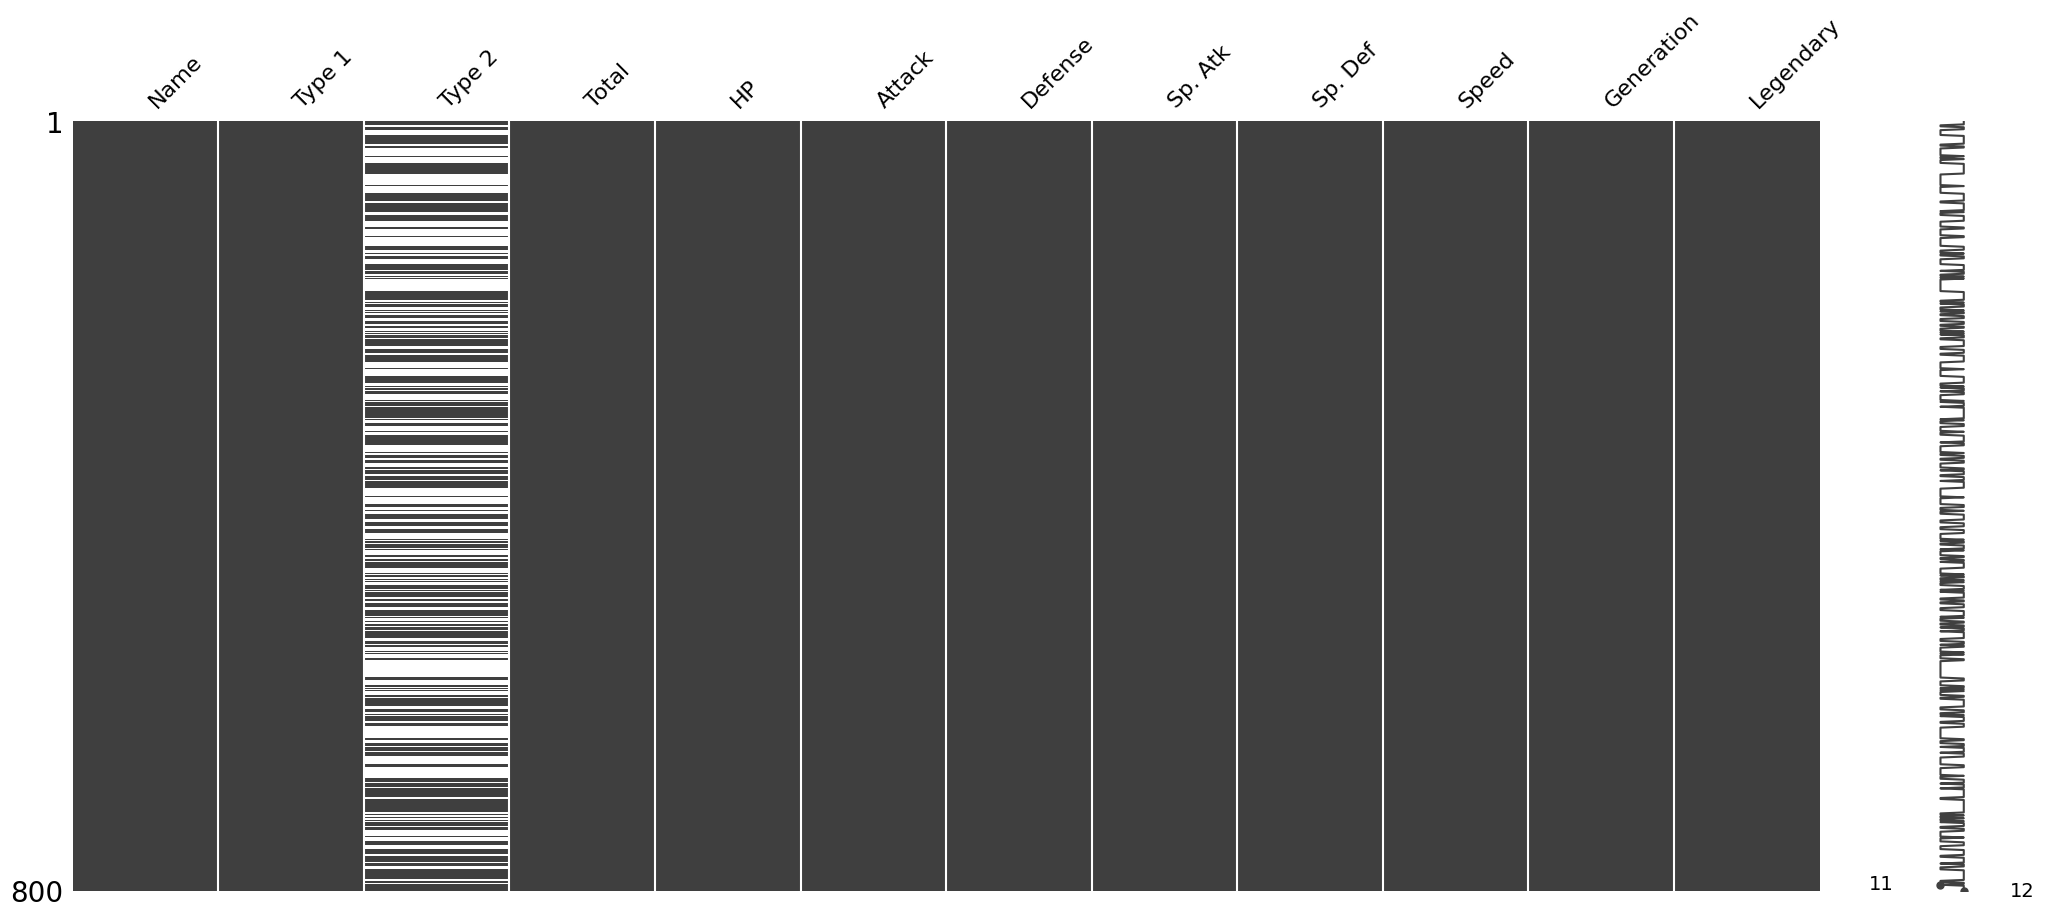

In [14]:
#Visualizo los valores nulos.
msno.matrix(pokemon)

###  x Outliers x 
Visualizo los Outliers de las columnas Total, Attack, Hp y Defense.

<Axes: ylabel='Total'>

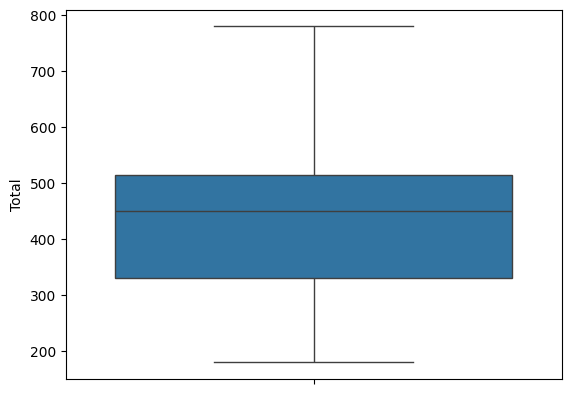

In [15]:
 
sns.boxplot(pokemon, y='Total')

<Axes: ylabel='Attack'>

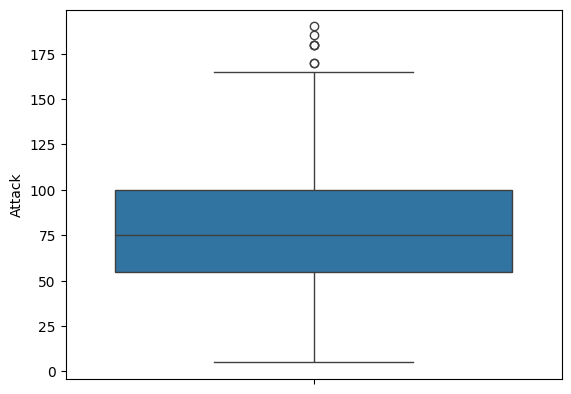

In [16]:
sns.boxplot(pokemon, y='Attack')

<Axes: ylabel='HP'>

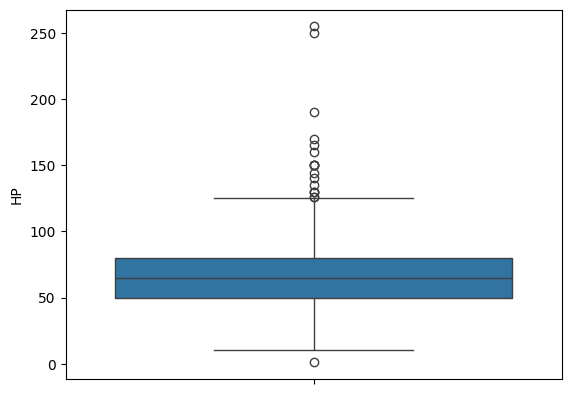

In [17]:
sns.boxplot(pokemon, y='HP')

<Axes: ylabel='Defense'>

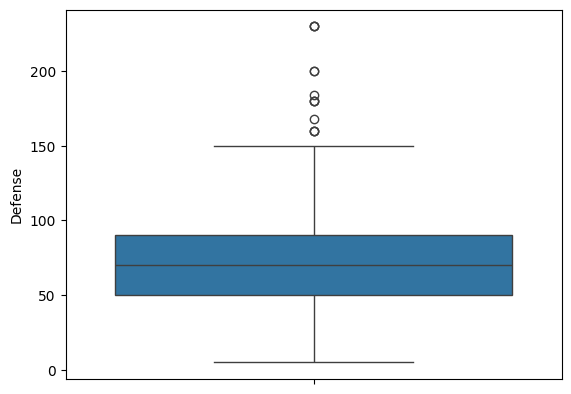

In [18]:
sns.boxplot(pokemon, y='Defense')

---

## Fase 2: Análisis y visualización.

---

###  x Generation x

In [19]:
#¿Cuántas generaciones hay?
pokemon['Generation'].nunique()

6

In [20]:
#¿Cuántos Pokémon por cada generación?
pokemon['Generation'].value_counts()

Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64

C:\Users\borja\AppData\Local\Temp\ipykernel_21112\2882608554.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Generation', data=pokemon, palette='Set2', legend=False)


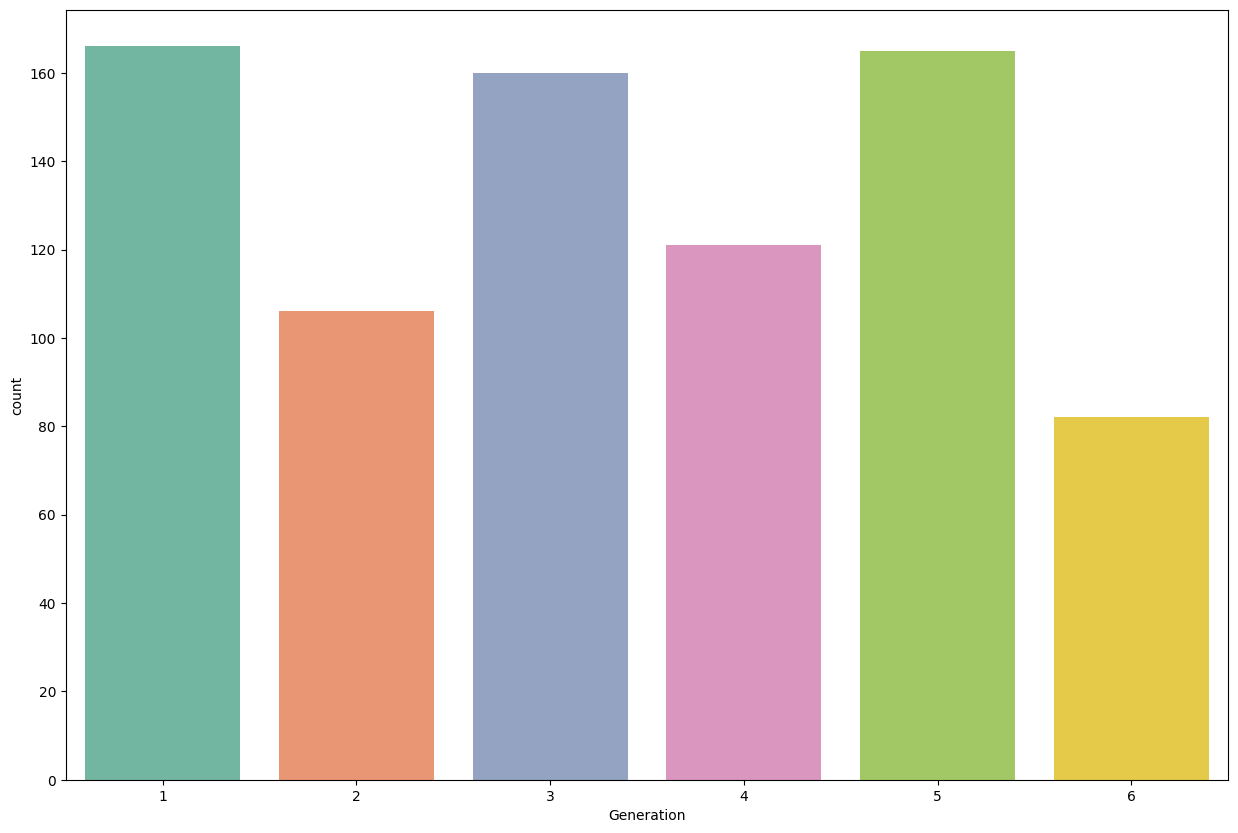

In [21]:
#Visualización 'count' por generación.
plt.figure(figsize=(15,10))
sns.countplot(x='Generation', data=pokemon, palette='Set2', legend=False)

plt.show()

In [22]:
#Selección de colores para diagrama de dispersión.

palette_generation = {
    1: '#0865de',      
    2: '#08d8de',     
    3: '#de0859',       
    4: '#d108de',    
    5: '#de8d08',    
    6: '#272625',           
}


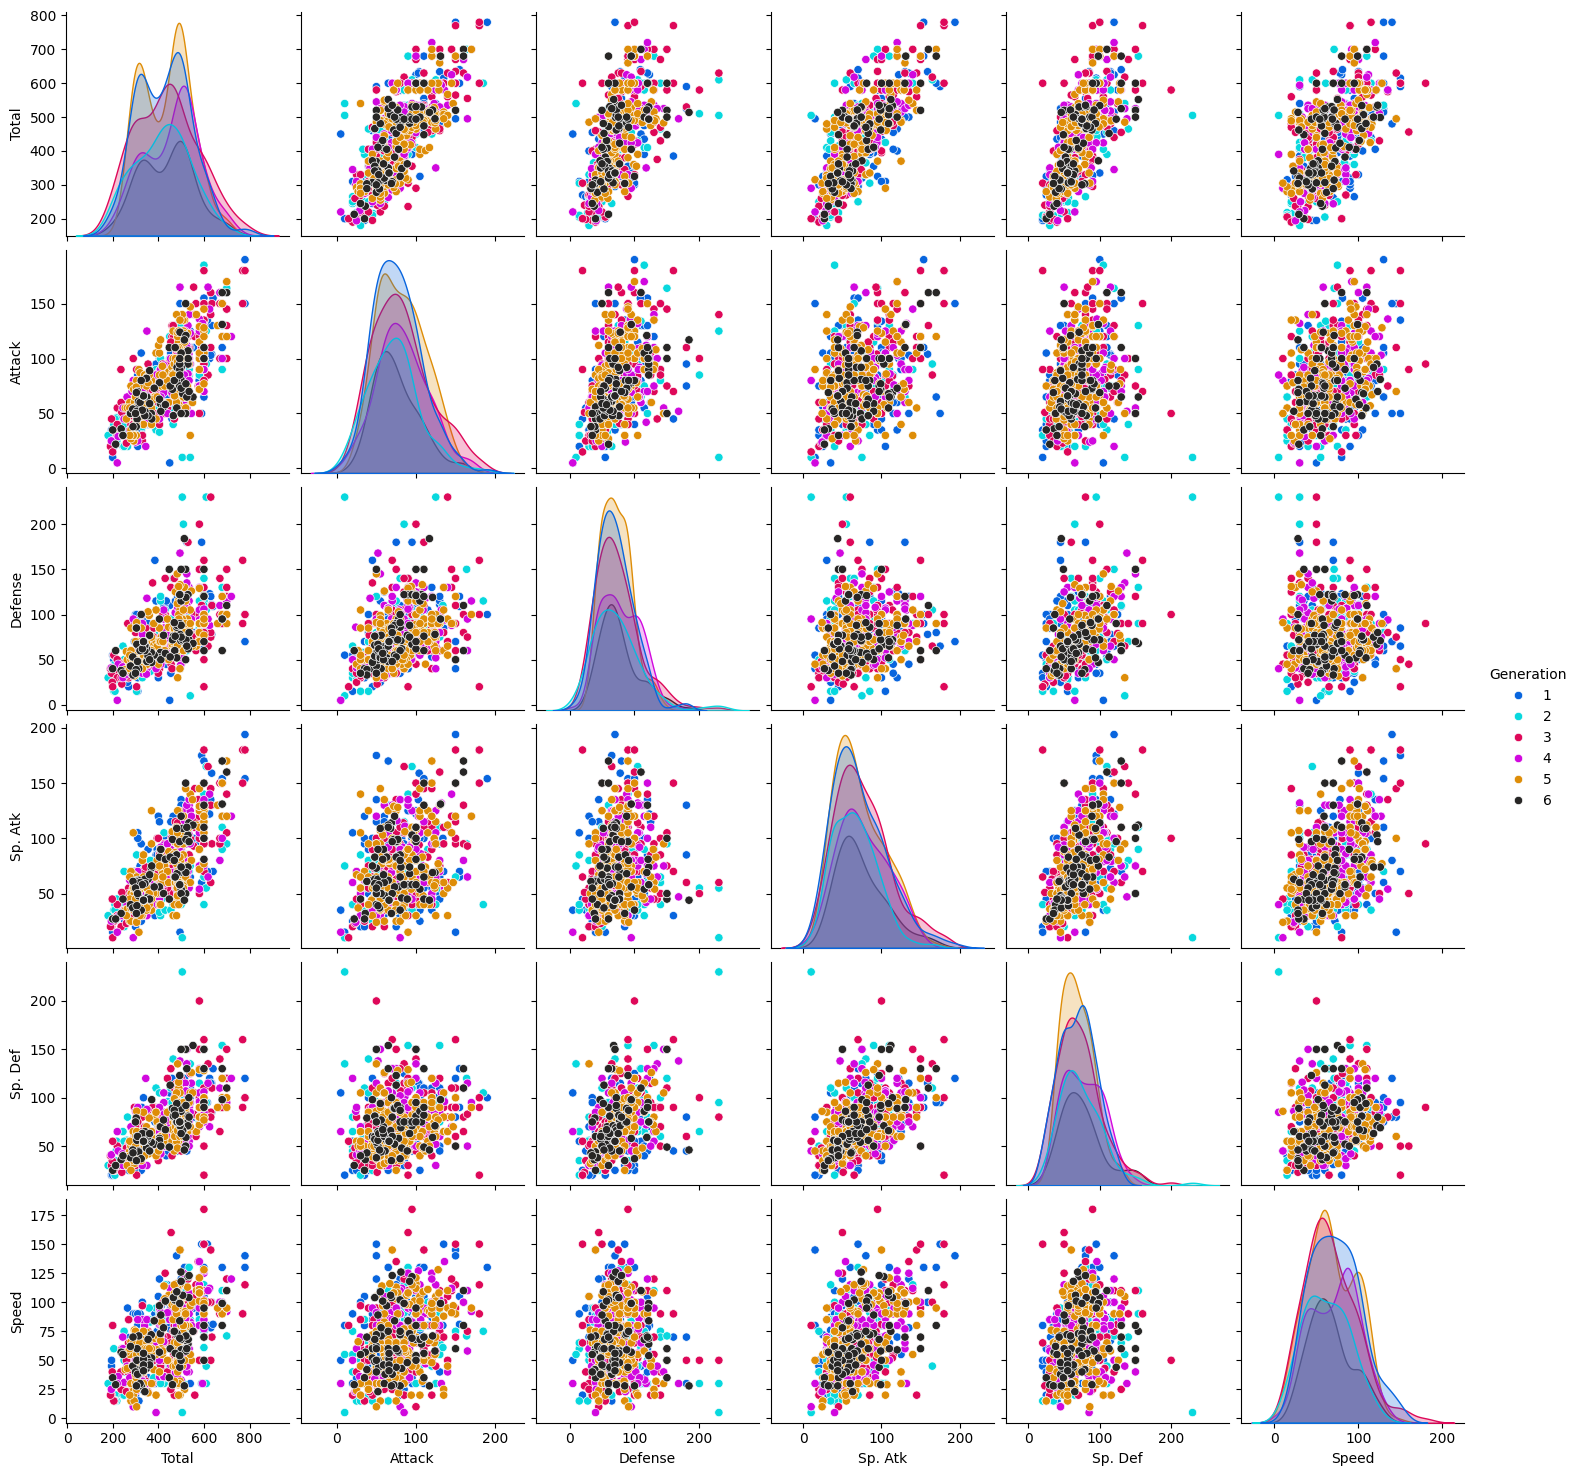

In [23]:
#Diagrama de dispersión para el análisis de las relaciones entre variables y su correlación por generación. 
sns.pairplot(pokemon, vars=['Total','Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], hue='Generation', palette=palette_generation)

<Axes: xlabel='Generation', ylabel='count'>

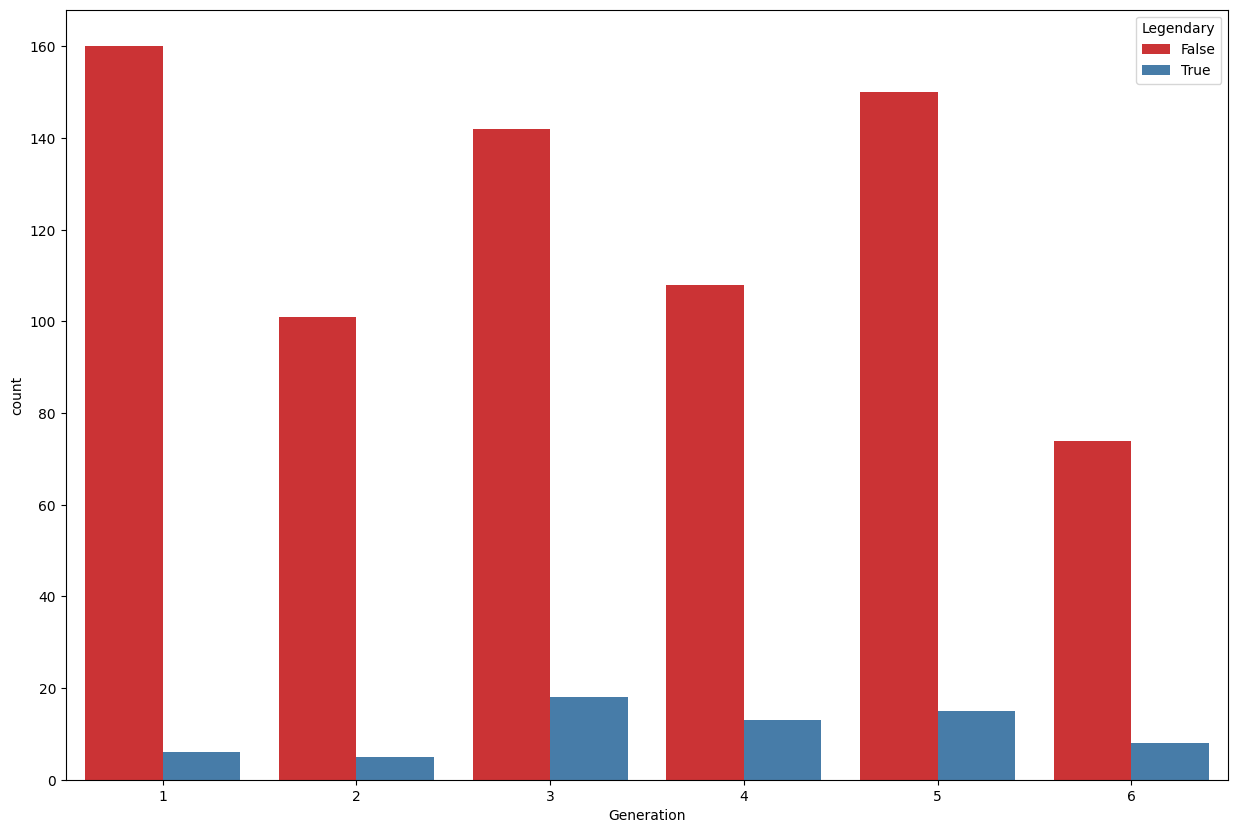

In [24]:
#Numero de Pokémon Legendarios por generación.
plt.figure(figsize=(15,10))
sns.countplot(x='Generation', data=pokemon, hue='Legendary', palette='Set1')

In [25]:
#Los Pokémon más fuertes por generación.  
#Localizo con este código los que tienen el total más alto(pokemon[pokemon['Generation'] == 6].sort_values('Total' , ascending = False).head(1)).
generation_best = pokemon.iloc[[163,268,426,552,711,796]]
generation_best


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
268,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
552,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True
711,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True


C:\Users\borja\AppData\Local\Temp\ipykernel_21112\2730178803.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(generation_best, x='Name', y='Total', palette='Set2', kind="bar",height = 15)


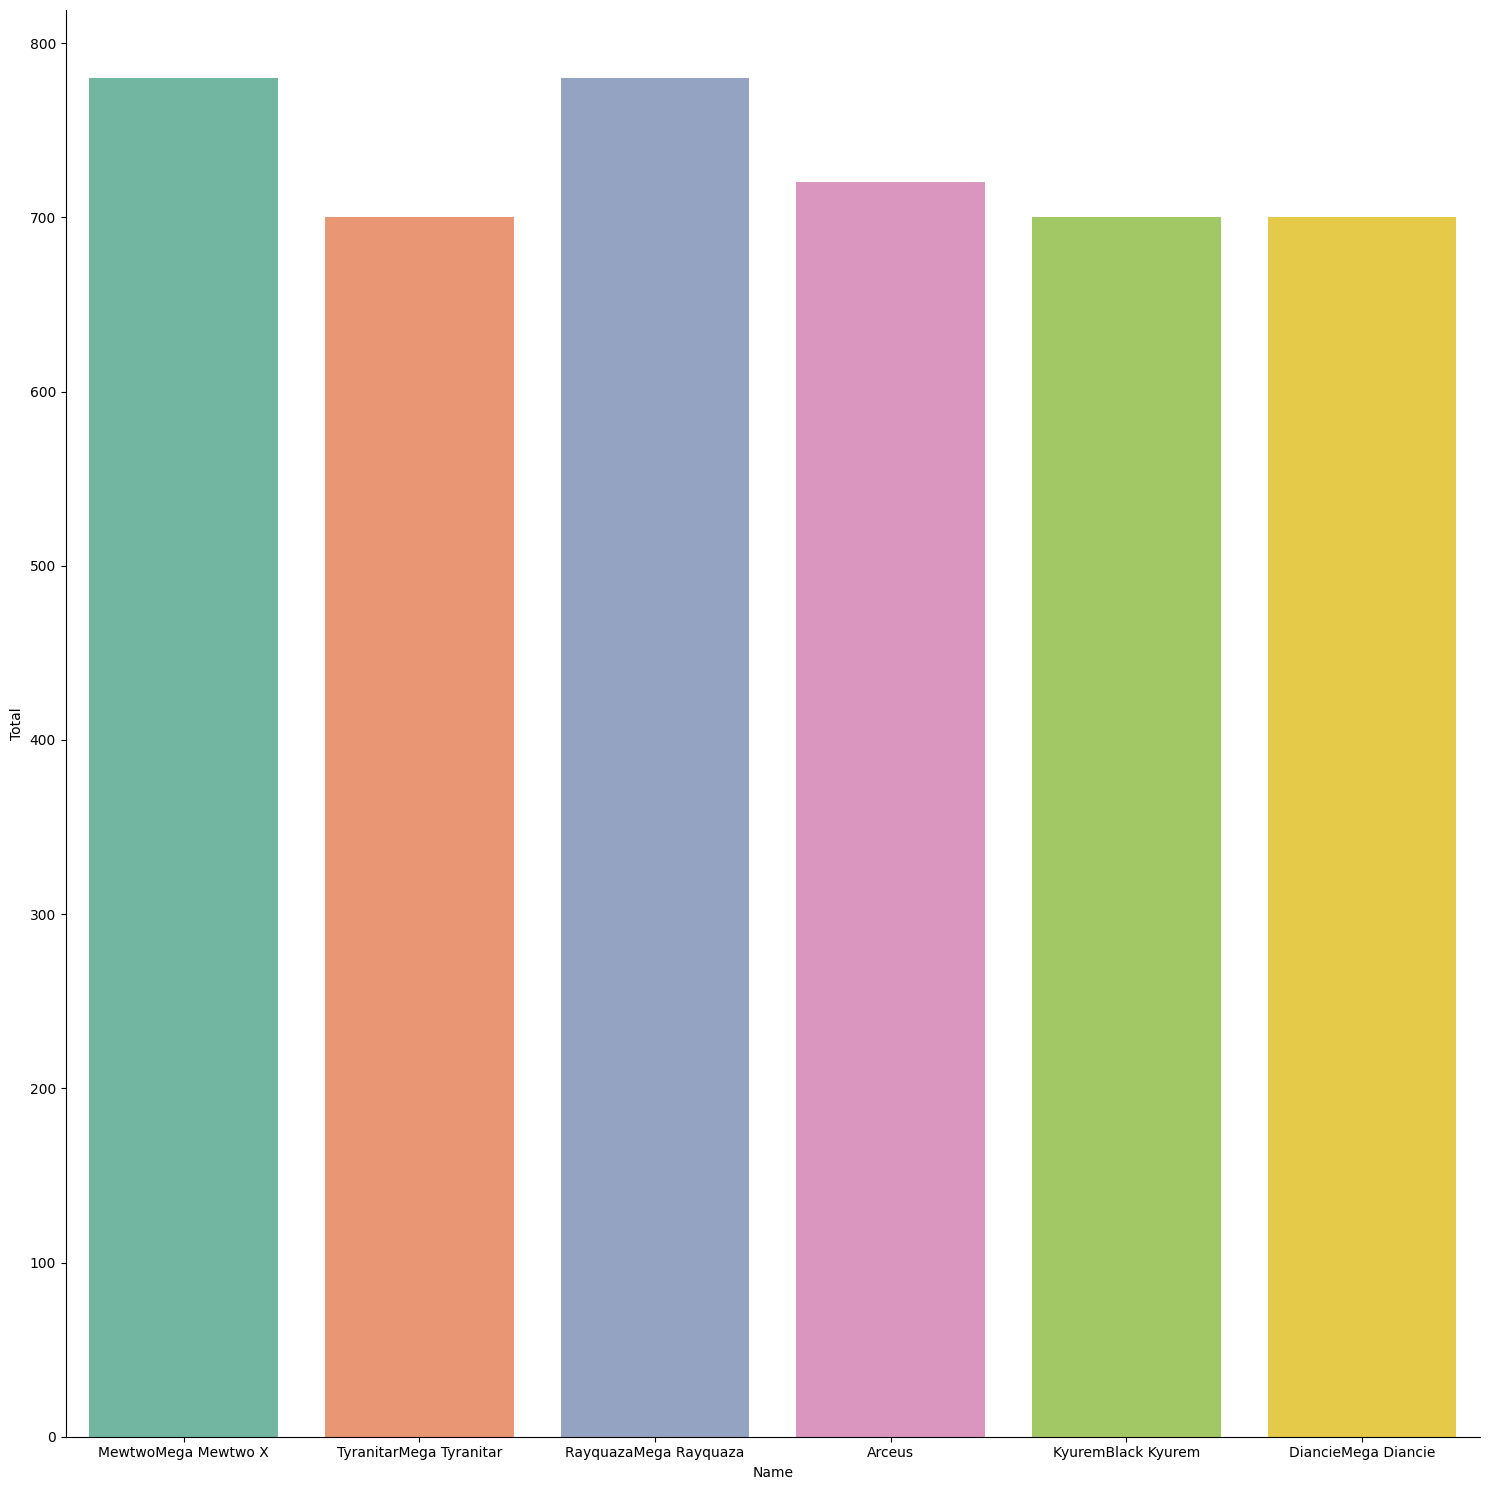

In [26]:
#Visualización de los pokémon más fuertes por generación.

sns.catplot(generation_best, x='Name', y='Total', palette='Set2', kind="bar",height = 15) 

In [35]:
#Función para crear la comparativa de estadisticas de los Pokémon seleccionados.


def PokeFight6(pokemon, p1, p2, p3, p4, p5, p6):
    
    def get_stats(df, name):
        poke = df[df["Name"] == name]
        if poke.empty:
            raise ValueError(f"Pokémon {name} no encontrado.")
        return [
            poke['HP'].values[0],
            poke['Attack'].values[0],
            poke['Defense'].values[0],
            poke['Sp. Atk'].values[0],
            poke['Sp. Def'].values[0],
            poke['Speed'].values[0],
            poke['HP'].values[0]  
        ]
    
    
    trace1 = go.Scatterpolar(
        r=get_stats(pokemon, p1),
        theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP'],
        fill='toself',
        name=p1
    )
    trace2 = go.Scatterpolar(
        r=get_stats(pokemon, p2),
        theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP'],
        fill='toself',
        name=p2
    )
    trace3 = go.Scatterpolar(
        r=get_stats(pokemon, p3),
        theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP'],
        fill='toself',
        name=p3
    )
    trace4 = go.Scatterpolar(
        r=get_stats(pokemon, p4),
        theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP'],
        fill='toself',
        name=p4
    )
    trace5 = go.Scatterpolar(
        r=get_stats(pokemon, p5),
        theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP'],
        fill='toself',
        name=p5
    )
    trace6 = go.Scatterpolar(
        r=get_stats(pokemon, p6),
        theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP'],
        fill='toself',
        name=p6
    )
    
    
    layout = go.Layout(
        title="Pokémons' Performance",
        polar=dict(
            radialaxis=dict(visible=True)
        ),
        showlegend=True
    )
    
    
    fig = go.Figure(data=[trace1, trace2, trace3, trace4, trace5, trace6], layout=layout)
    
    
    fig.show()


PokeFight6(pokemon, 'MewtwoMega Mewtwo X', 'TyranitarMega Tyranitar', 'RayquazaMega Rayquaza', 'Arceus', 'KyuremBlack Kyurem', 'DiancieMega Diancie')


---

###  x Type x

In [28]:

#¿Cuántos tipos de Pokémon existen?
pokemon['Type 1'].nunique()

18

In [29]:
#¿Cuántos Pokémon por tipo existen?
pokemon['Type 1'].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

C:\Users\borja\AppData\Local\Temp\ipykernel_21112\3249628964.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




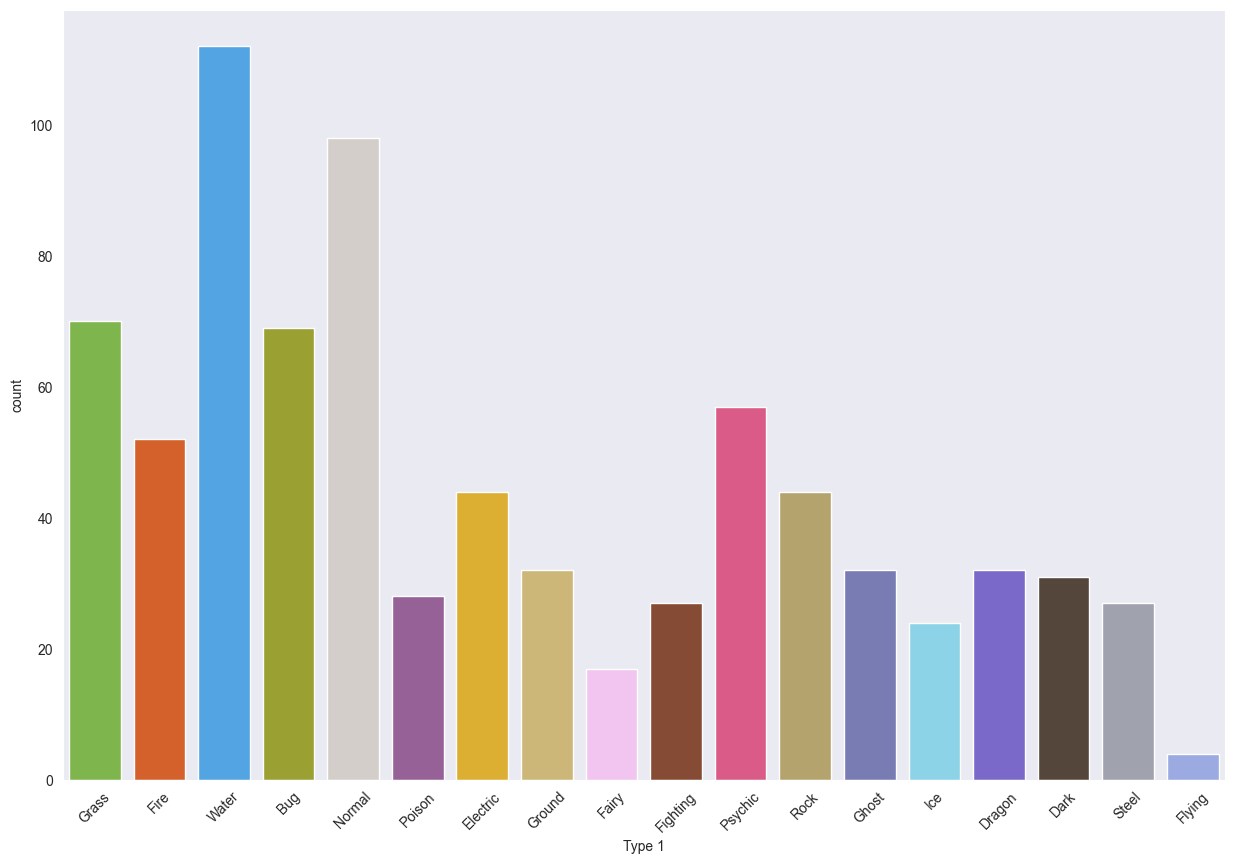

In [30]:
#Visualizacion del numero de Pokémon por tipo.
sns.set_style('dark')
plt.figure(figsize=(15,10))
sns.countplot(x='Type 1', data=pokemon, palette=['#7ec63c','#f0560f','#3ba7fa','#aab31f','#d5cec8','#9e58a0','#f8bc16','#dabe6a','#f9bef8','#944526','#ef4681','#c1a961','#6f72bd','#7ddbf7','#7059d8','#584537','#9ea0af','#8fa3ec'])
plt.xticks(rotation = 45)

plt.show()

([<matplotlib.patches.Wedge at 0x1c6f2869010>,
 [Text(0.995309757563562, 0.4683572210383475, 'Water'),
  Text(0.33169184093511905, 1.0487995626701376, 'Normal'),
  Text(-0.38072871039866113, 1.0320104888411612, 'Grass'),
  Text(-0.8611677119802669, 0.6843903651007021, 'Bug'),
  Text(-1.0828692739909174, 0.19337563302128707, 'Psychic'),
  Text(-1.0654414905459044, -0.27355882406407844, 'Fire'),
  Text(-0.8899184718302892, -0.6465640830538323, 'Rock'),
  Text(-0.6182919259650814, -0.9097884887633996, 'Electric'),
  Text(-0.32344447301654244, -1.0513722808192403, 'Ground'),
  Text(-0.051816579827776044, -1.0987788867897634, 'Ghost'),
  Text(0.2230661273215511, -1.077145070471831, 'Dragon'),
  Text(0.48005106648808793, -0.9897226750780491, 'Dark'),
  Text(0.6944887293282358, -0.8530447847774774, 'Poison'),
  Text(0.8611680981541949, -0.6843898791781532, 'Fighting'),
  Text(0.9859226635657357, -0.48780785301945023, 'Steel'),
  Text(1.0632602661804214, -0.28191772977579754, 'Ice'),
  Text(1.

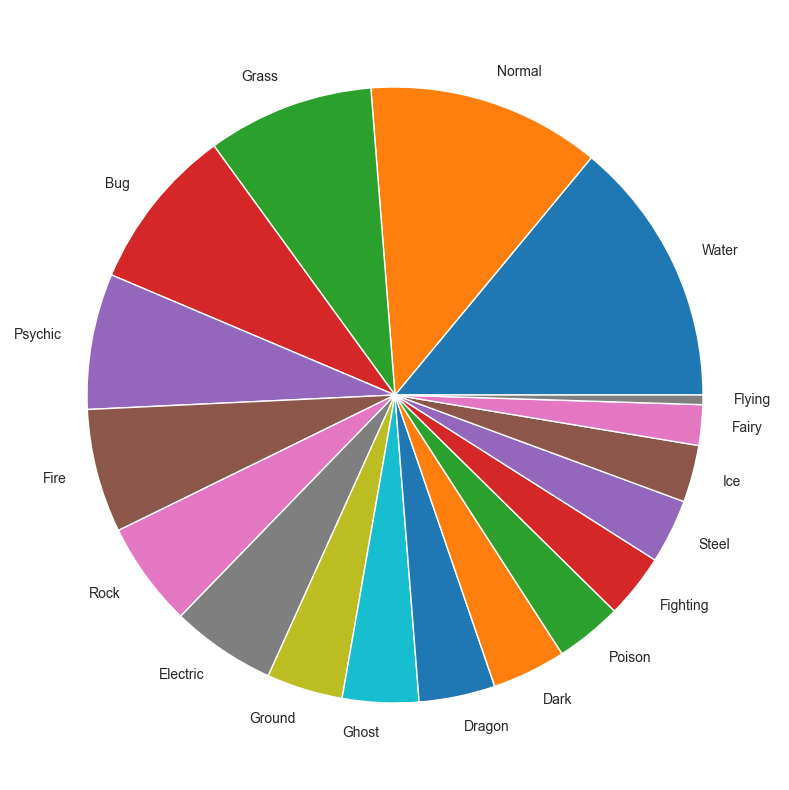

In [31]:
#Visualizacion del numero de Pokémon por tipo en formato tarta.
plt.figure(figsize=(15,10))
plt.pie(pokemon['Type 1'].value_counts(), labels = pokemon['Type 1'].value_counts().index)

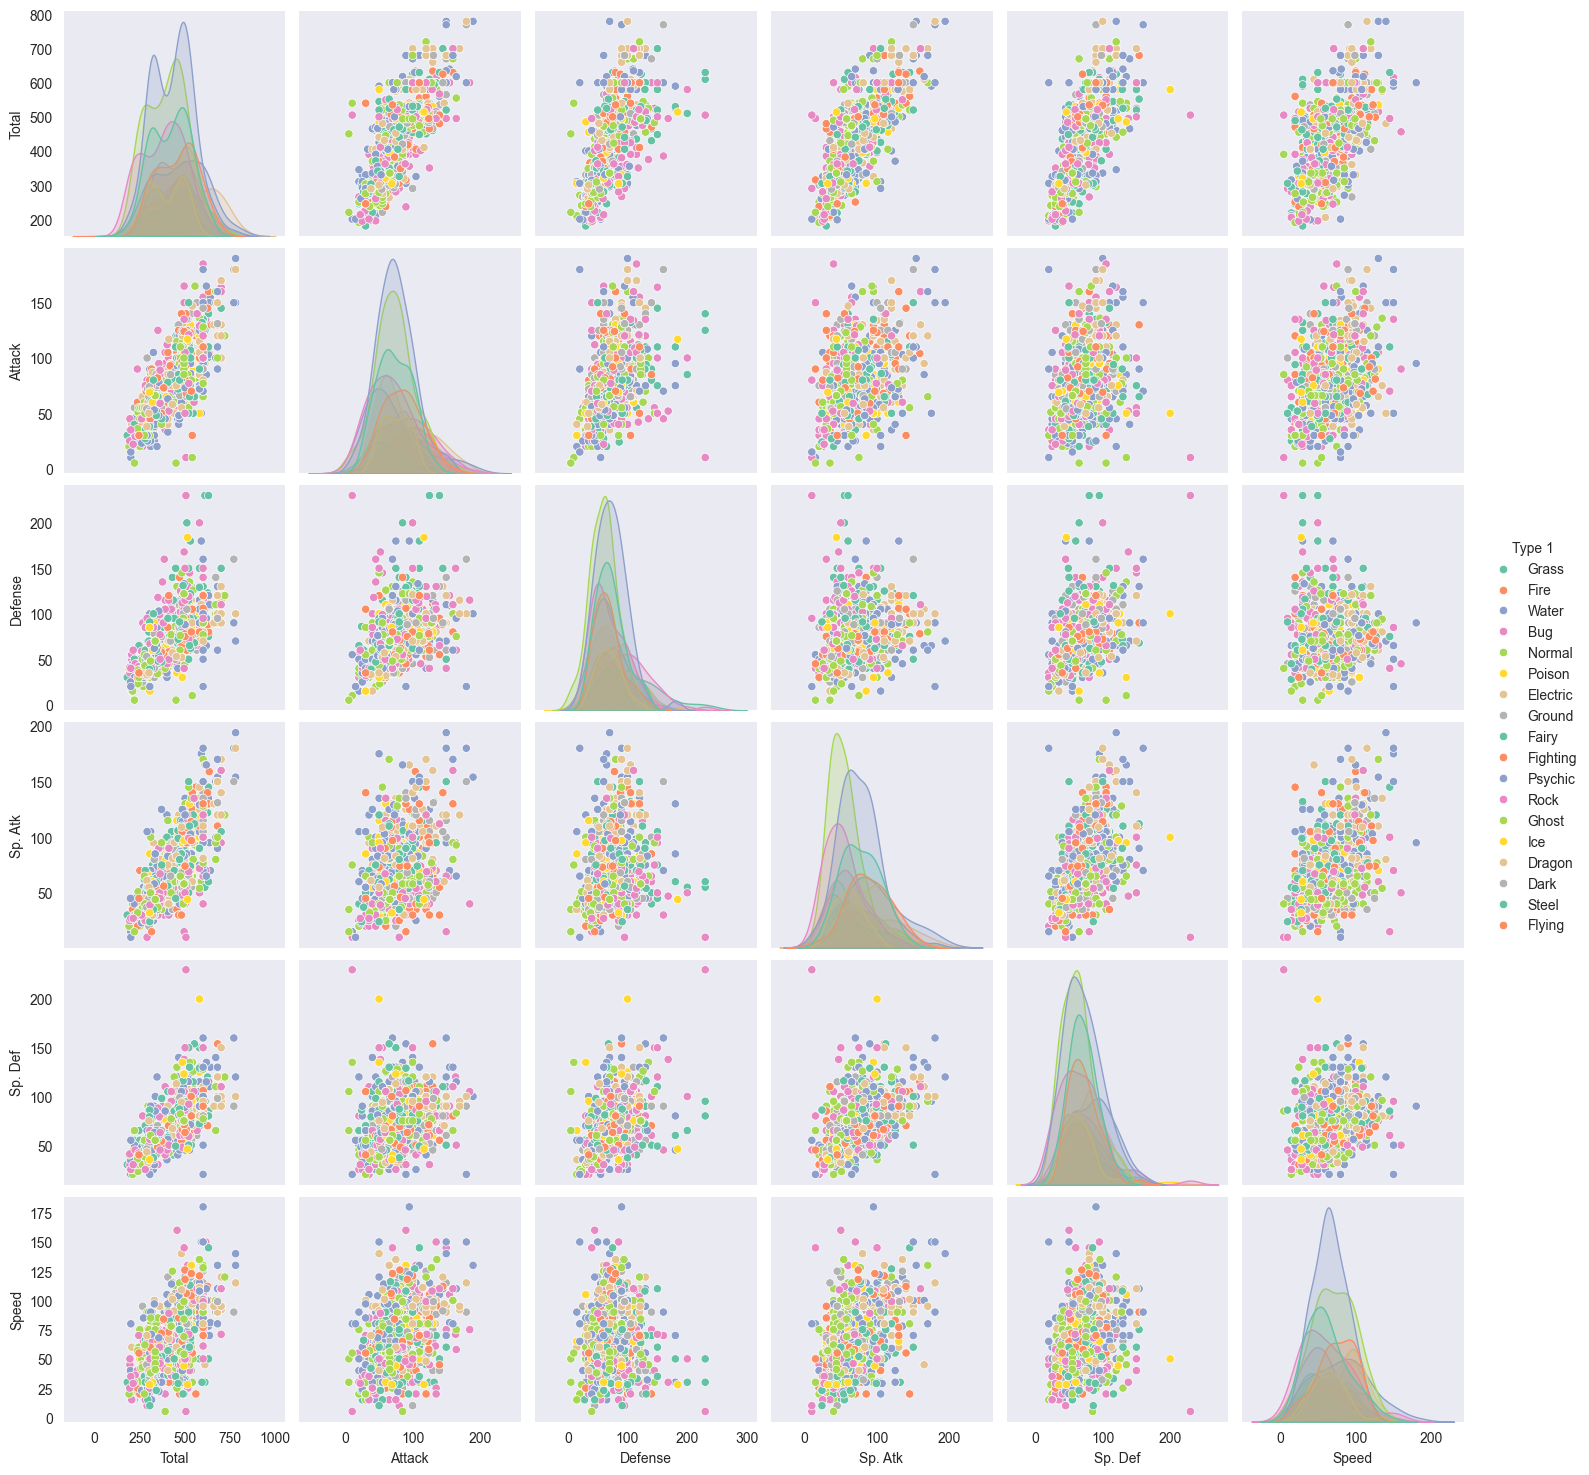

In [ ]:
#Diagrama de dispersión para el análisis de las relaciones entre variables y su correlación por tipo. 
sns.pairplot(pokemon, vars=['Total','Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], hue='Type 1', palette='Set2')

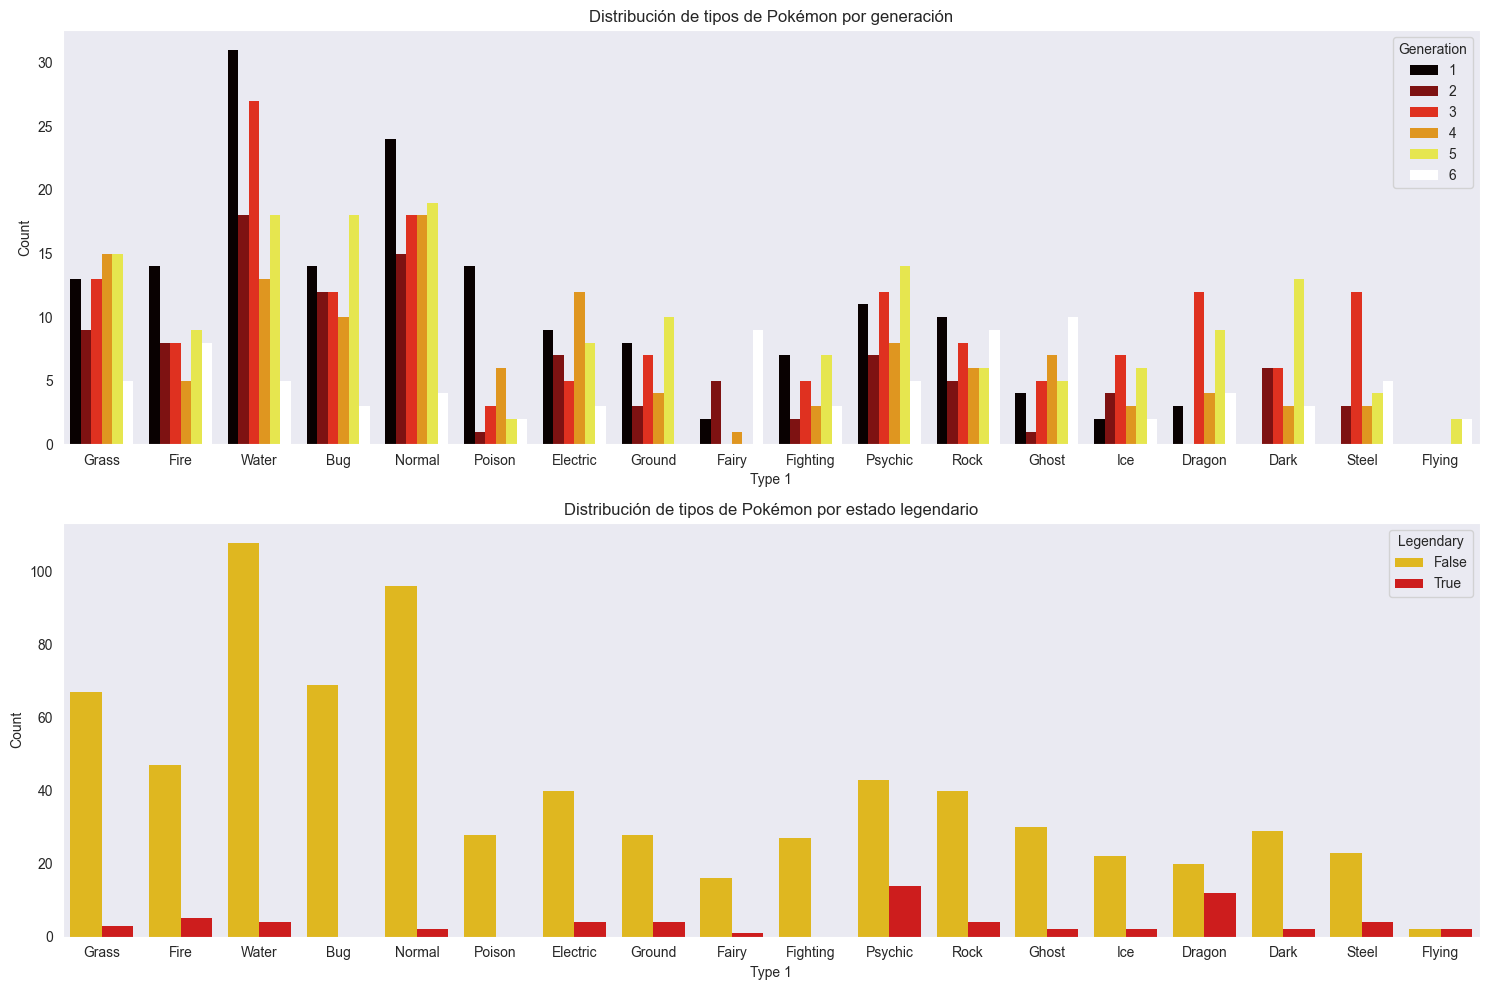

In [33]:
sns.set_style('dark')
plt.figure(figsize=(15,10))

#Distribución de tipos de Pokémon por generación
plt.subplot(2, 1, 1)
sns.countplot(data=pokemon, x='Type 1', hue='Generation', palette='hot', linewidth=0, alpha=1)
plt.title('Distribución de tipos de Pokémon por generación')
plt.xlabel('Type 1')
plt.ylabel('Count')

#Distribución de tipos de Pokémon por estado legendario
plt.subplot(2, 1, 2)
sns.countplot(data=pokemon, x='Type 1', hue='Legendary', palette='hot_r', linewidth=0, alpha=1)
plt.title('Distribución de tipos de Pokémon por estado legendario')
plt.xlabel('Type 1')
plt.ylabel('Count')


plt.tight_layout()
plt.show()



C:\Users\borja\AppData\Local\Temp\ipykernel_21112\2174707638.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\borja\AppData\Local\Temp\ipykernel_21112\2174707638.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\borja\AppData\Local\Temp\ipykernel_21112\2174707638.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Distribución de tipos de Pokémon por vida')

<Figure size 1500x1000 with 0 Axes>

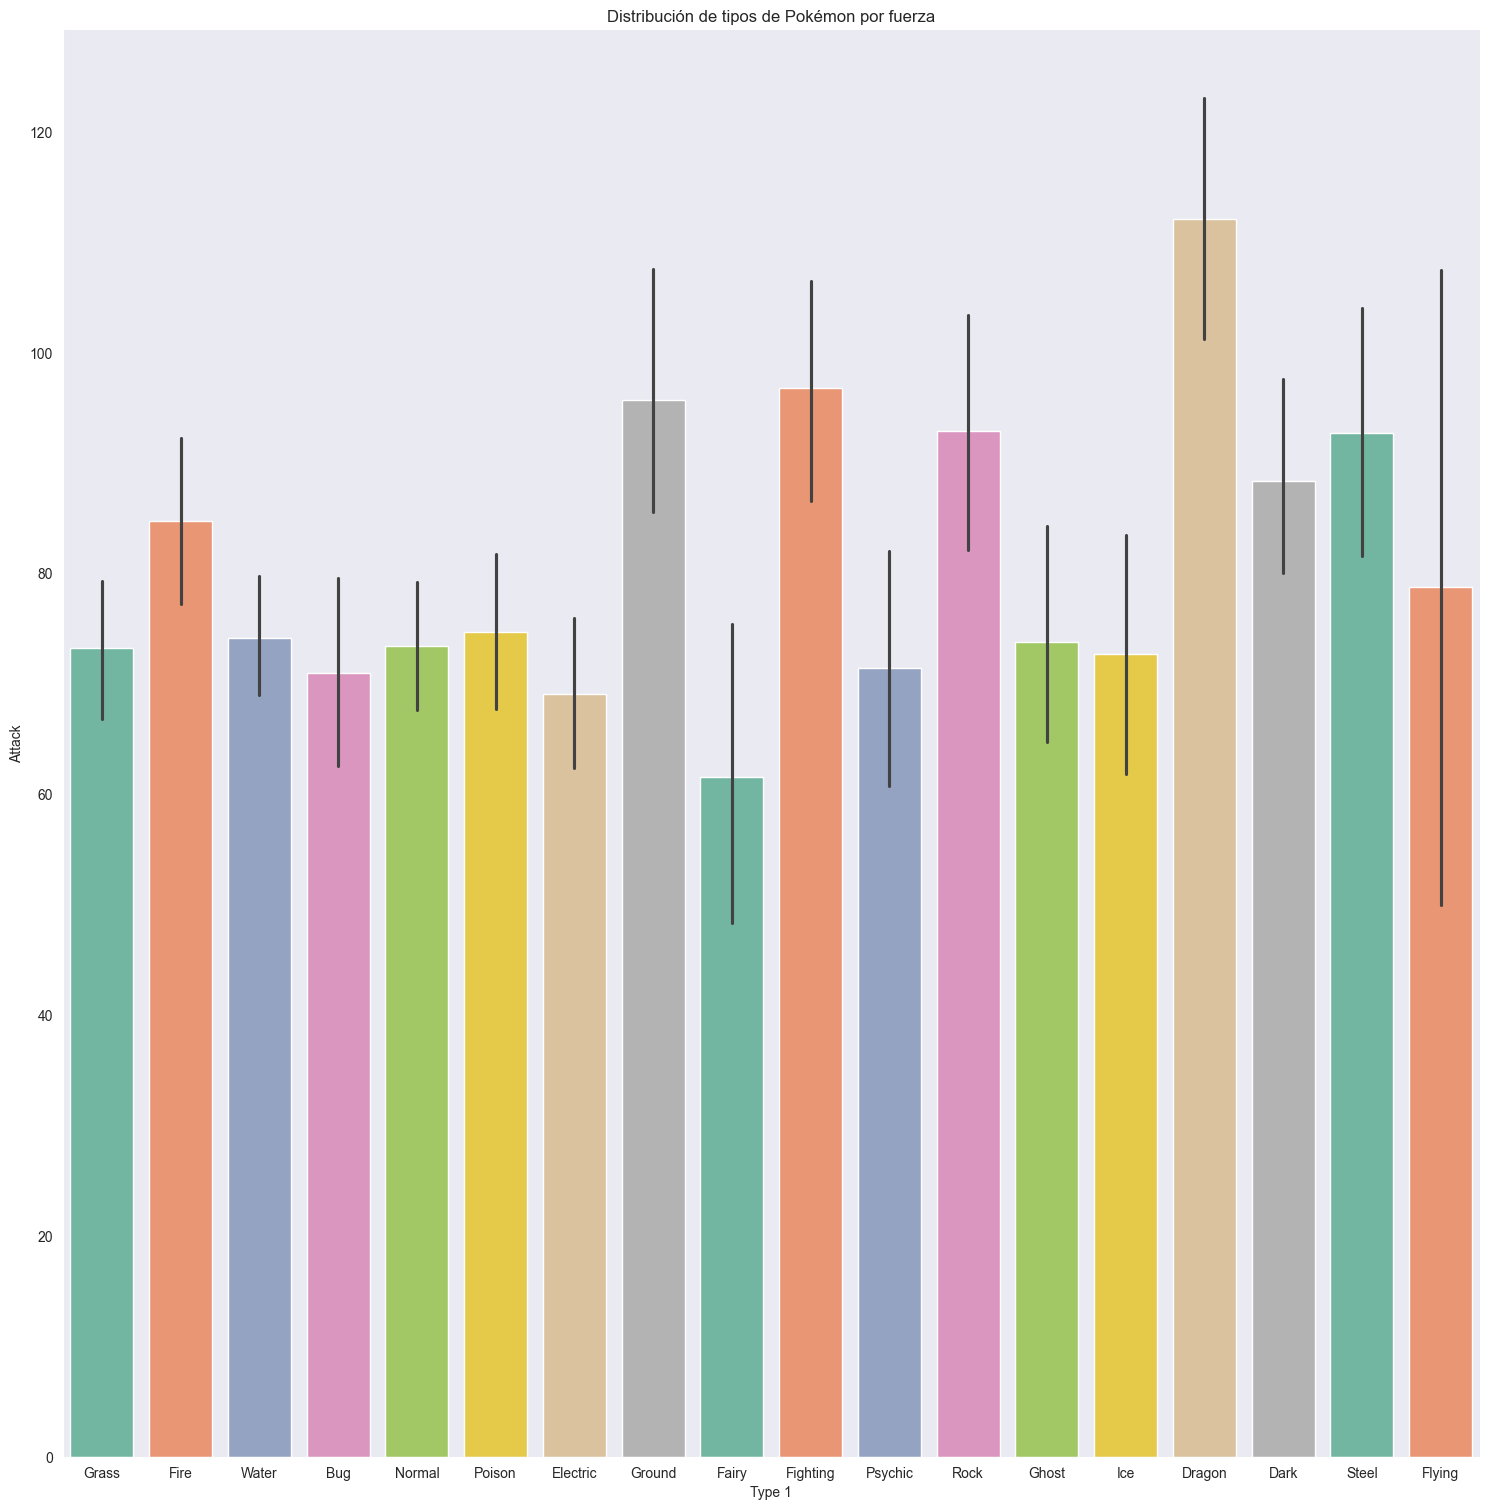

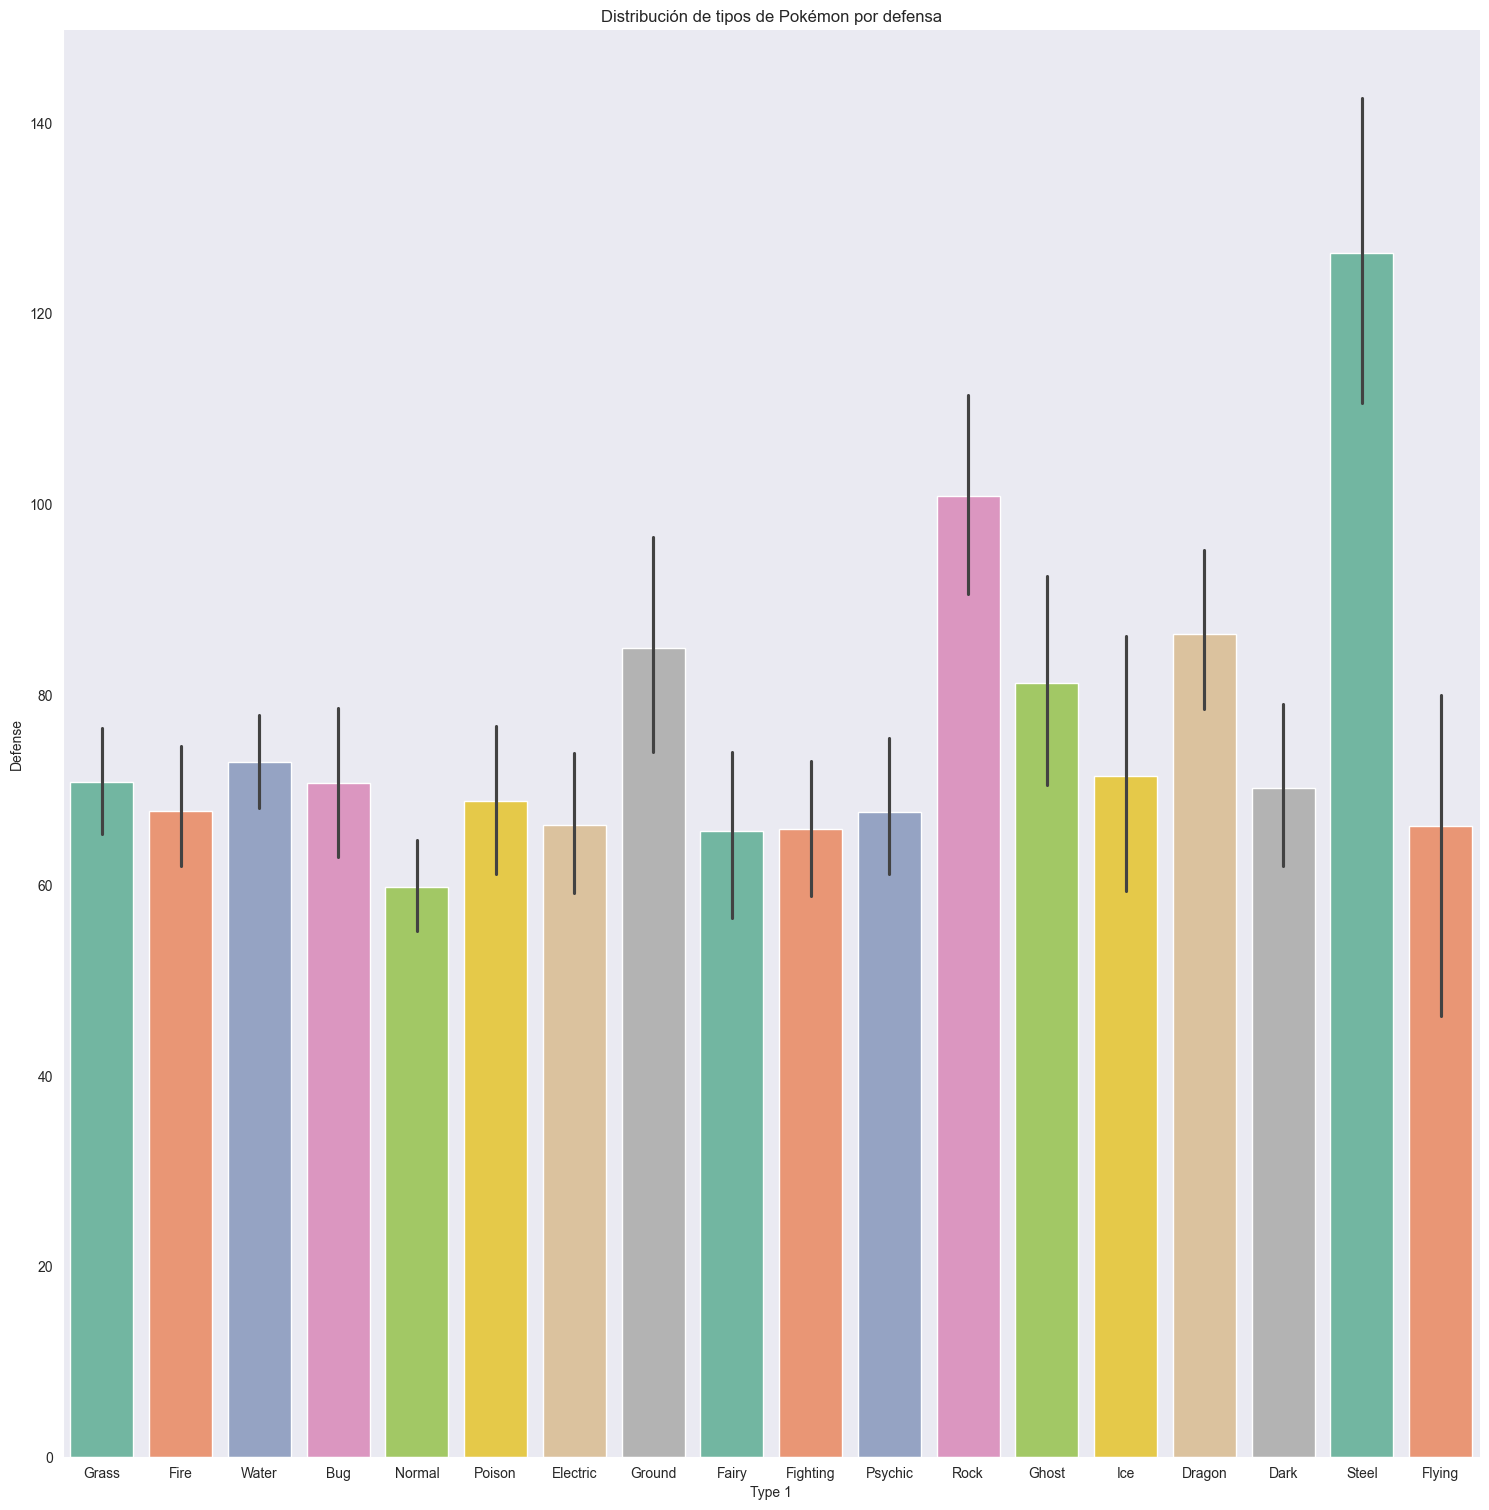

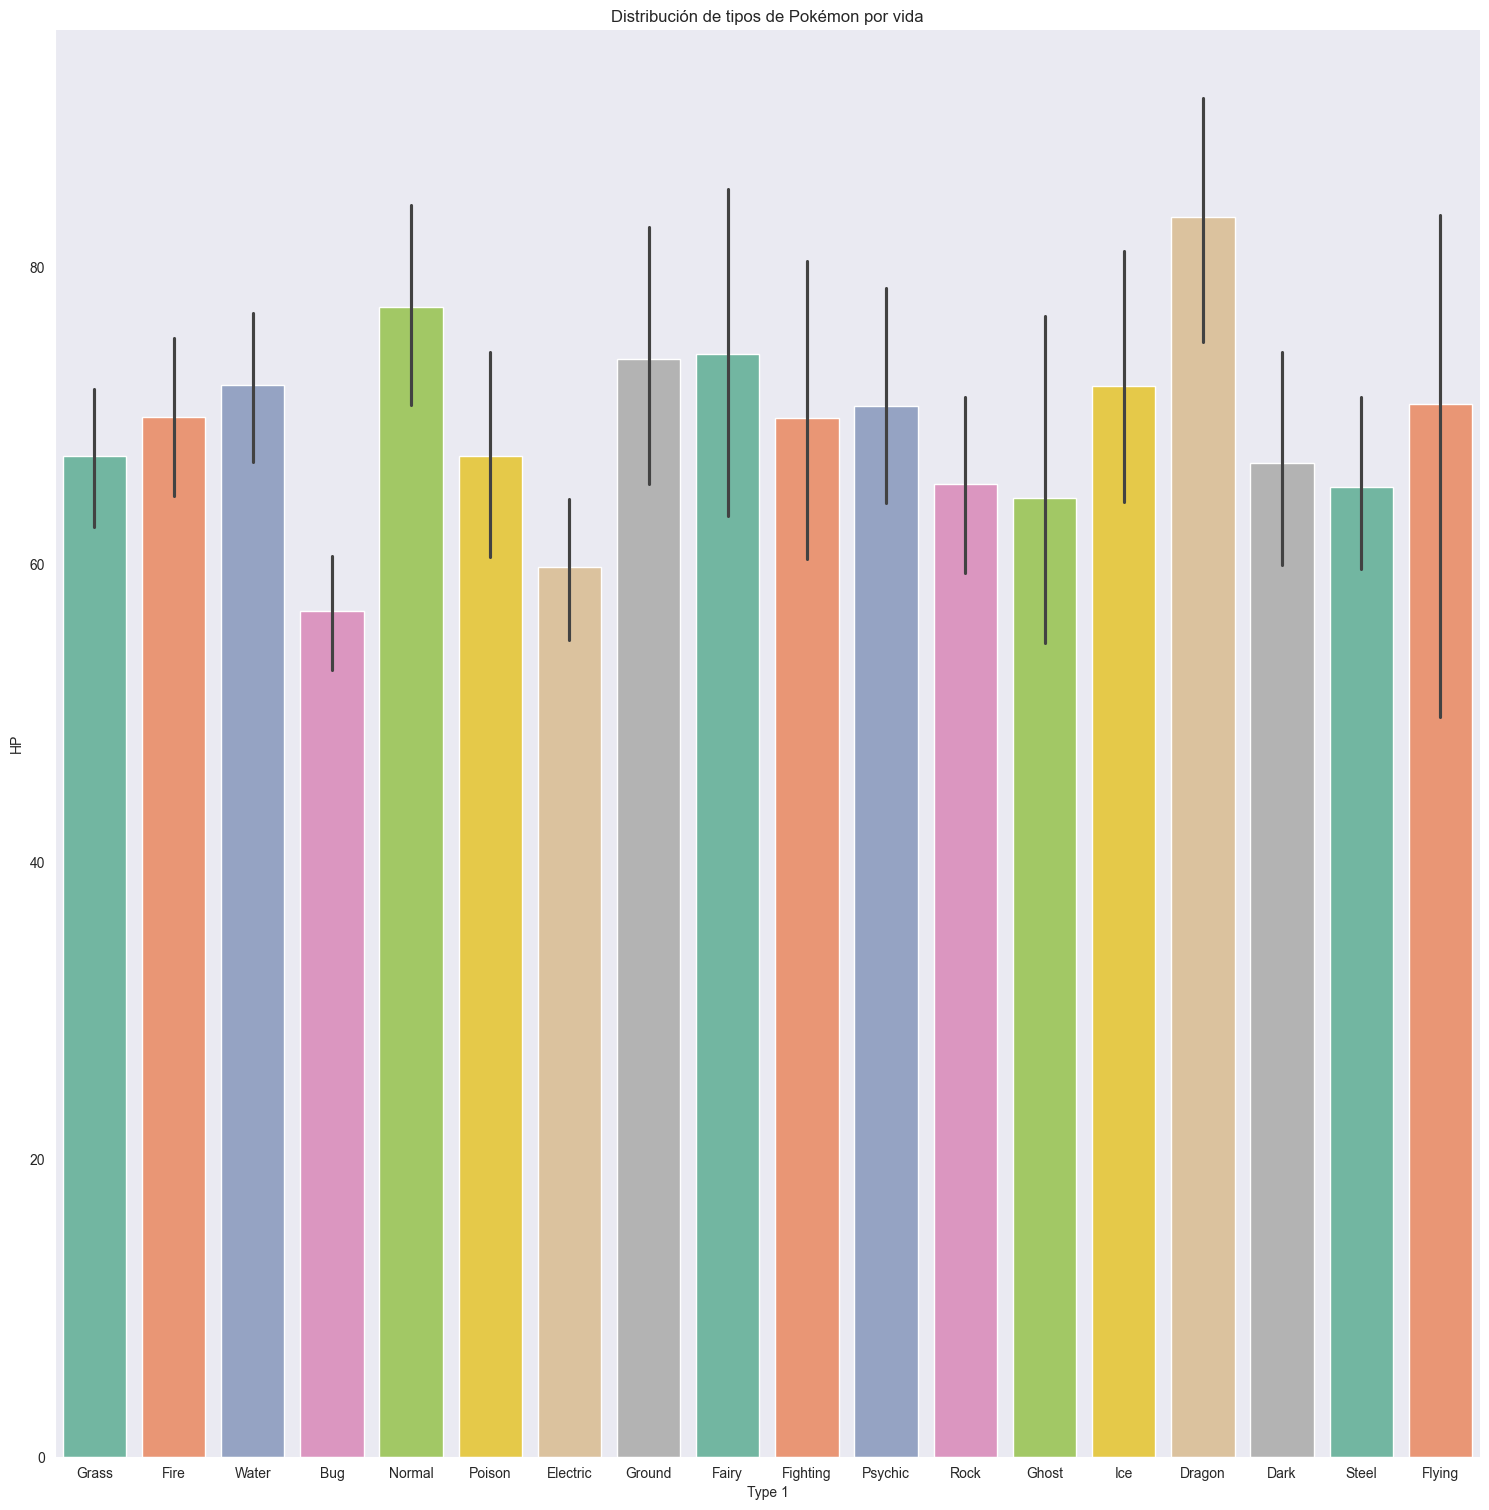

In [43]:
#Distribución de pokemon por tipo con indicadores de fuerza, vida y defensa.
plt.figure(figsize=(15,10))
sns.catplot(pokemon, x='Type 1', y='Attack', palette='Set2', kind="bar", height = 15) 
plt.title('Distribución de tipos de Pokémon por fuerza')

sns.catplot(pokemon, x='Type 1', y='Defense', palette='Set2', kind="bar", height = 15) 
plt.title('Distribución de tipos de Pokémon por defensa')

sns.catplot(pokemon, x='Type 1', y='HP', palette='Set2', kind="bar", height = 15) 
plt.title('Distribución de tipos de Pokémon por vida')



<Axes: xlabel='Type 1', ylabel='Total'>

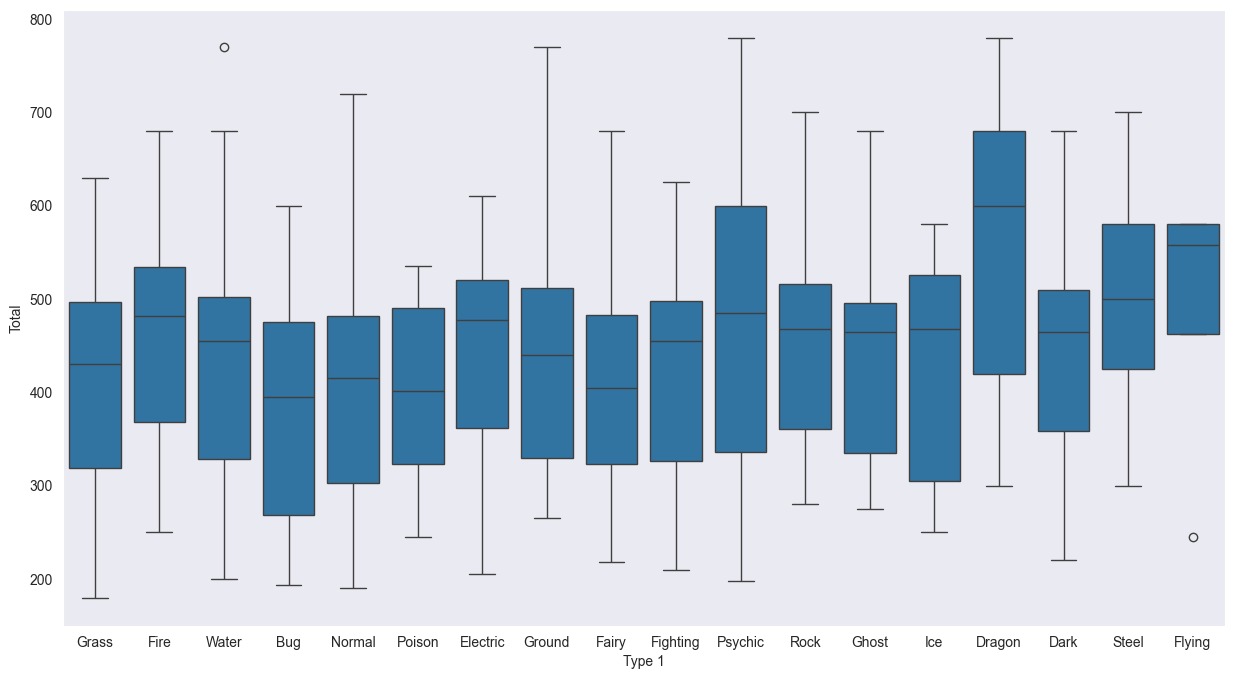

In [85]:
#Visualización de los Outliers por tipo.
plt.figure(figsize=(15,8)) 
sns.boxplot(x = pokemon['Type 1'],y = pokemon['Total'])

In [46]:
#¿Cual es el pokemon más fuerte por tipo y sus estadisticas? 
best_type = pokemon.loc[pokemon.groupby('Type 1')['Attack'].idxmax(), ['Type 1','Name','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
best_type

,Type 1,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
232,Bug,HeracrossMega Heracross,80,185,115,40,105,75
393,Dark,AbsolMega Absol,65,150,60,115,60,115
426,Dragon,RayquazaMega Rayquaza,105,180,100,180,100,115
517,Electric,Electivire,75,123,67,95,85,95
792,Fairy,Xerneas,126,131,95,131,98,99
498,Fighting,LucarioMega Lucario,70,145,88,140,70,112
279,Fire,BlazikenMega Blaziken,80,160,80,130,80,100
702,Flying,TornadusIncarnate Forme,79,115,70,125,80,111
387,Ghost,BanetteMega Banette,64,165,75,93,83,75
511,Grass,AbomasnowMega Abomasnow,90,132,105,132,105,30


C:\Users\borja\AppData\Local\Temp\ipykernel_21112\1690202090.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Distribución de tipos de Pokémon por fuerza')

<Figure size 1500x1000 with 0 Axes>

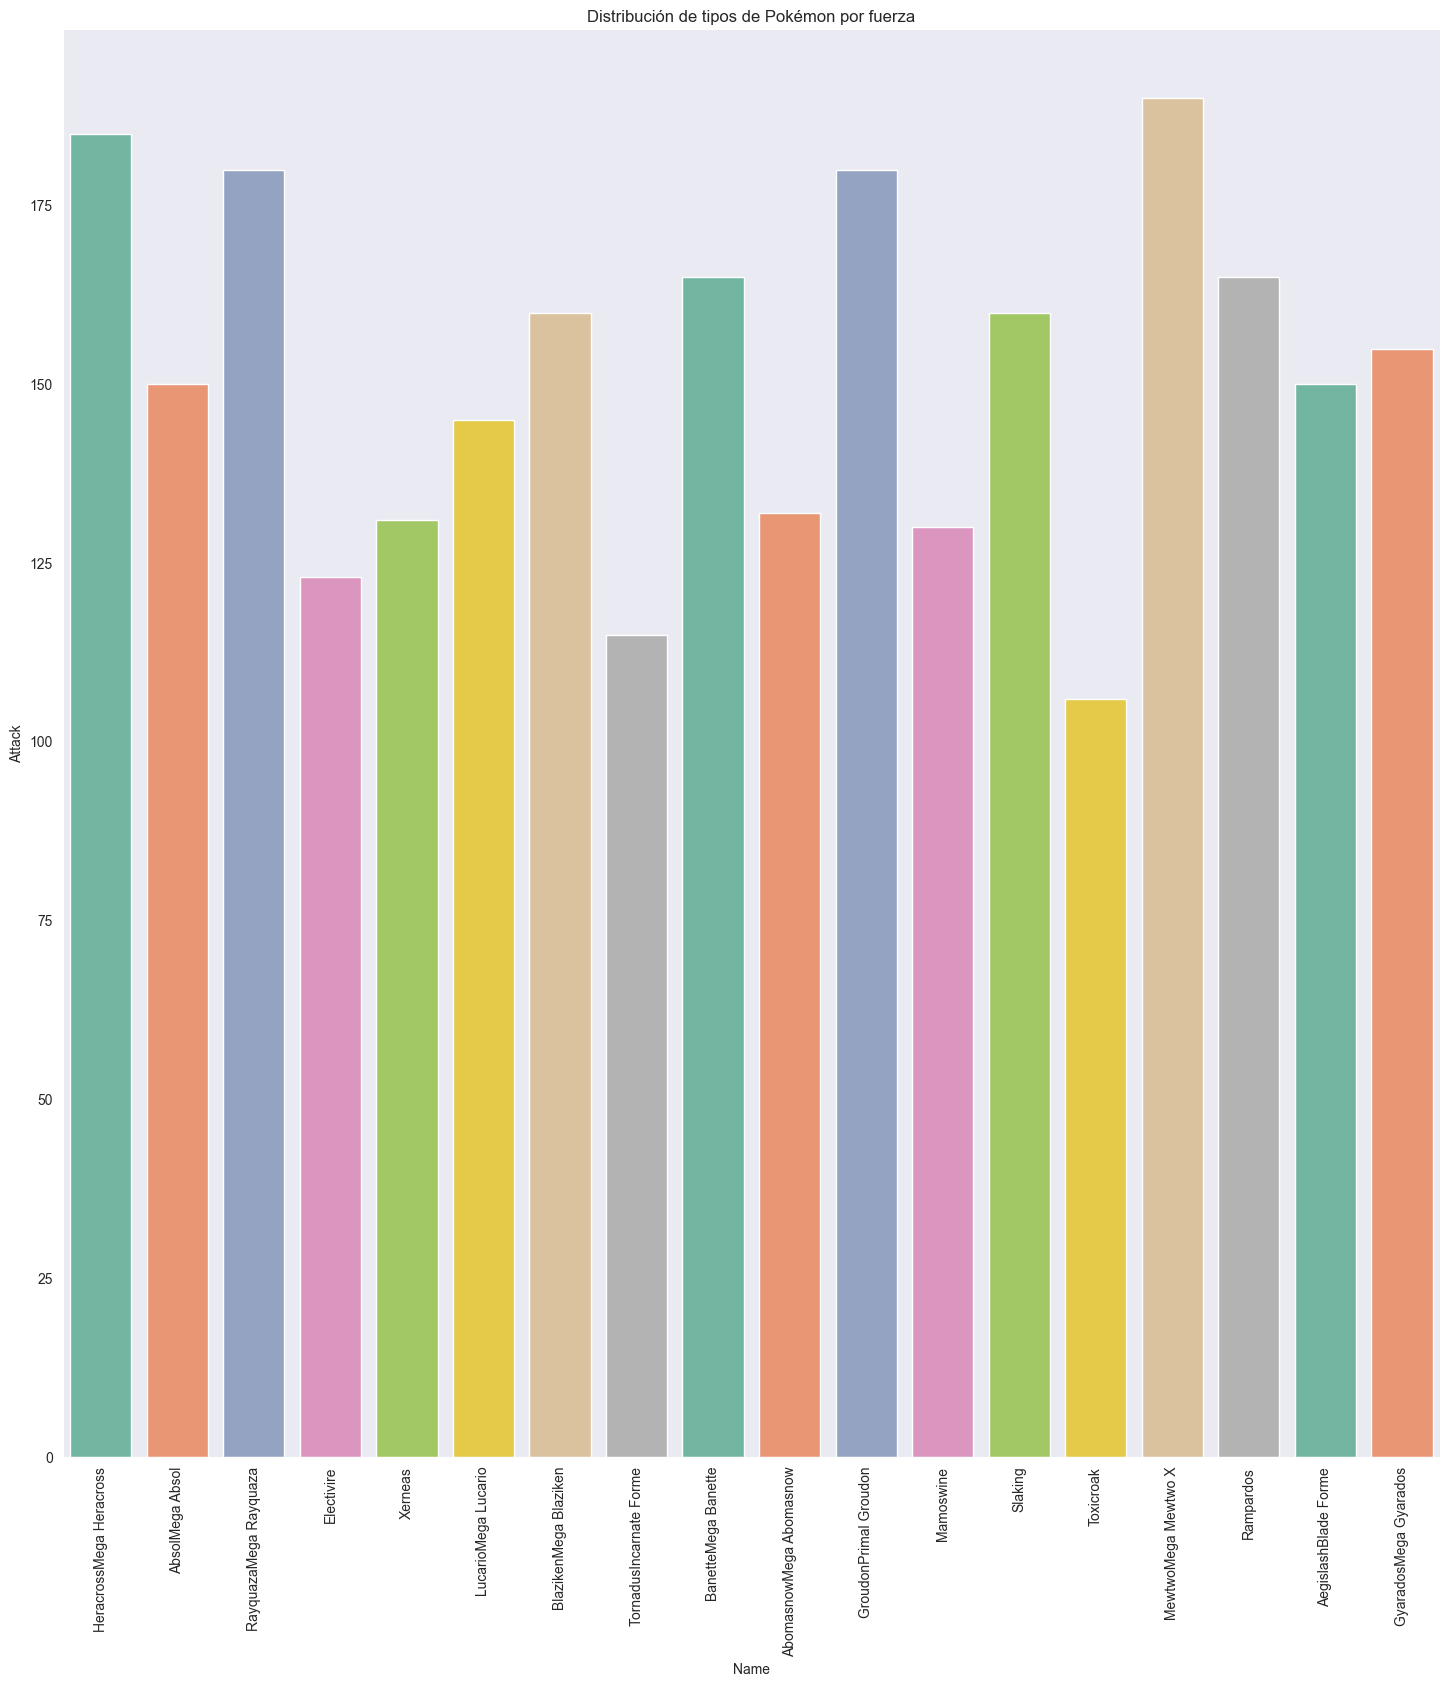

In [ ]:
#Visualización: ¿Cual es el pokemon más fuerte por tipo? 
plt.figure(figsize=(15,10))
sns.catplot(best_type, x='Name', y='Attack', palette='Set2', kind="bar", height = 15) 
plt.xticks(rotation = 90)
plt.title('Distribución de tipos de Pokémon por fuerza')

Text(0, 0.5, '')

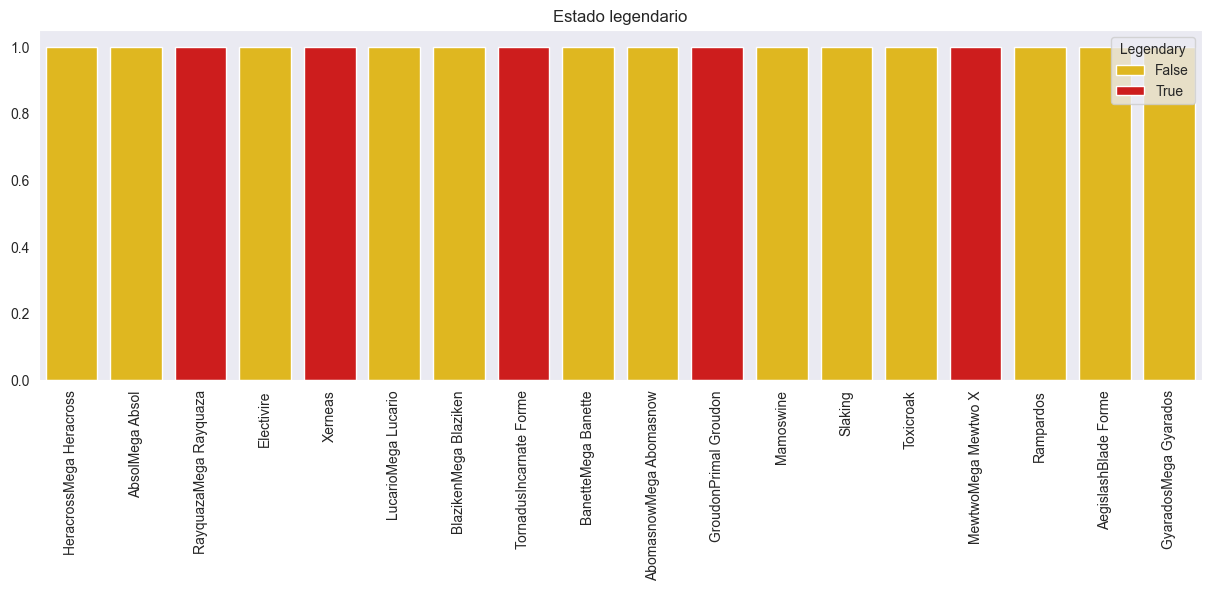

In [68]:
#Son los Pokémon más fuertes de cada tipo legendarios o no?
best_type_legend = pokemon.loc[pokemon.groupby('Type 1')['Attack'].idxmax(), ['Type 1','Total','Name','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Legendary']]
best_type_legend
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 2)
sns.countplot(data=best_type_legend, x='Name', hue='Legendary', palette='hot_r', )
plt.xticks(rotation = 90)
plt.title('Estado legendario')
plt.xlabel(' ')
plt.ylabel('')

In [99]:
#Comparativa visual estilo video juego de las estadisticas de los Pokémon más fuertes por tipo. 

def PokeFightfull(pokemon, *pokemons):
    def get_stats(df, name):
        poke = df[df["Name"] == name]
        if poke.empty:
            raise ValueError(f"Pokémon {name} no encontrado.")
        return [
            poke['HP'].values[0],
            poke['Attack'].values[0],
            poke['Defense'].values[0],
            poke['Sp. Atk'].values[0],
            poke['Sp. Def'].values[0],
            poke['Speed'].values[0],
            poke['HP'].values[0]
        ]

    traces = []
    for name in pokemons:
        trace = go.Scatterpolar(
            r=get_stats(pokemon, name),
            theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP'],
            fill='toself',
            name=name
        )
        traces.append(trace)

    layout = go.Layout(
        title="Pokémons' Performance",
        polar=dict(
            radialaxis=dict(visible=True)
        ),
        showlegend=True
    )

    fig = go.Figure(data=traces, layout=layout)
    fig.show()

# Llamada a la función con 18 Pokémon
PokeFightfull(
    pokemon, 
    'HeracrossMega Heracross', 
    'AbsolMega Absol',
    'RayquazaMega Rayquaza',
    'Electivire',
    'Xerneas',
    'LucarioMega Lucario',
    'BlazikenMega Blaziken',
    'TornadusIncarnate Forme',
    'BanetteMega Banette',
    'AbomasnowMega Abomasnow',
    'GroudonPrimal Groudon',
    'Mamoswine',
    'Slaking',
    'Toxicroak',
    'MewtwoMega Mewtwo X',
    'Rampardos',
    'AegislashBlade Forme',
    'GyaradosMega Gyarados'
)


---

###  x Best of the Best x

In [82]:
#Numero total de Pokémon
len(pokemon)


800

In [79]:
#El Pokémon con el total de estadisticas más alto.
pokemon.sort_values('Total', ascending = False).head(1)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


In [86]:
#El Pokémon con más vida.
pokemon.sort_values('HP', ascending = False).head(1)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False


In [87]:
#El Pokémon con el ataque más fuerte.
pokemon.sort_values('Attack', ascending = False).head(1)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [90]:
#El Pokémon con la defensa más alta.
pokemon.sort_values('Defense', ascending = False).head(1)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
333,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False


In [91]:
#El Pokémon más rapido.
pokemon.sort_values('Speed', ascending = False).head(1)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
431,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True


In [92]:
#El Pokémon más debil.
pokemon.sort_values('Total').head(1)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
206,Sunkern,Grass,NaN,180,30,30,30,30,30,30,2,False


In [104]:
#Grupo con los mejores de cada estadistica.
best_of_best = pokemon.iloc[[426,261,163,333,431]]
best_of_best

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
261,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
333,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False
431,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True


Text(0, 0.5, '')

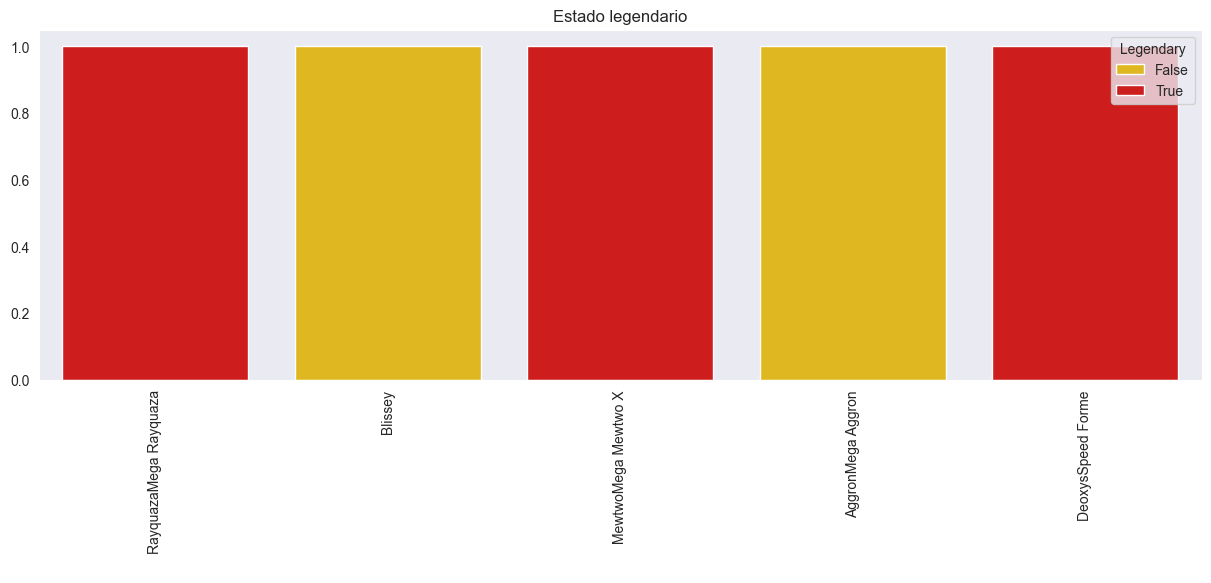

In [ ]:
#¿De los mejores de cada estadística cuales son legendarios?
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 2)
sns.countplot(data=best_of_best, x='Name', hue='Legendary', palette='hot_r', )
plt.xticks(rotation = 90)
plt.title('Estado legendario')
plt.xlabel(' ')
plt.ylabel('')

Text(0, 0.5, 'Count')

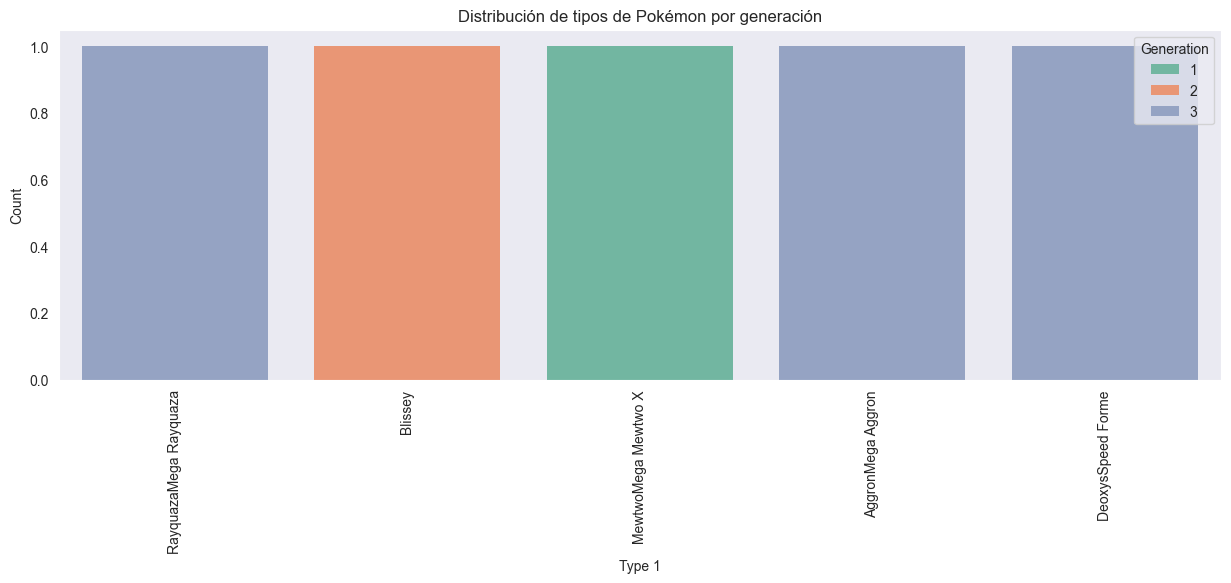

In [98]:
#¿De que generación son los mejores de cada estadistica?
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
sns.countplot(data=best_of_best, x='Name', hue='Generation', palette='Set2', linewidth=0, alpha=1)
plt.title('Distribución de tipos de Pokémon por generación')
plt.xticks(rotation = 90)
plt.xlabel('Type 1')
plt.ylabel('Count')

In [106]:
#Comparativa visual estilo video juego de las estadisticas del grupo Best of best.
PokeFightfull(pokemon, 'RayquazaMega Rayquaza', 'Blissey','MewtwoMega Mewtwo X', 'AggronMega Aggron','DeoxysSpeed Forme')

---

###  x The best initial x

In [108]:
#Selección de los pokemon iniciales para el estudio
best_ini = pokemon.iloc[[9,4,0]]
best_ini

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
9,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


Text(0.5, 1.0, 'Distribución de Pokémon inicales por velocidad')

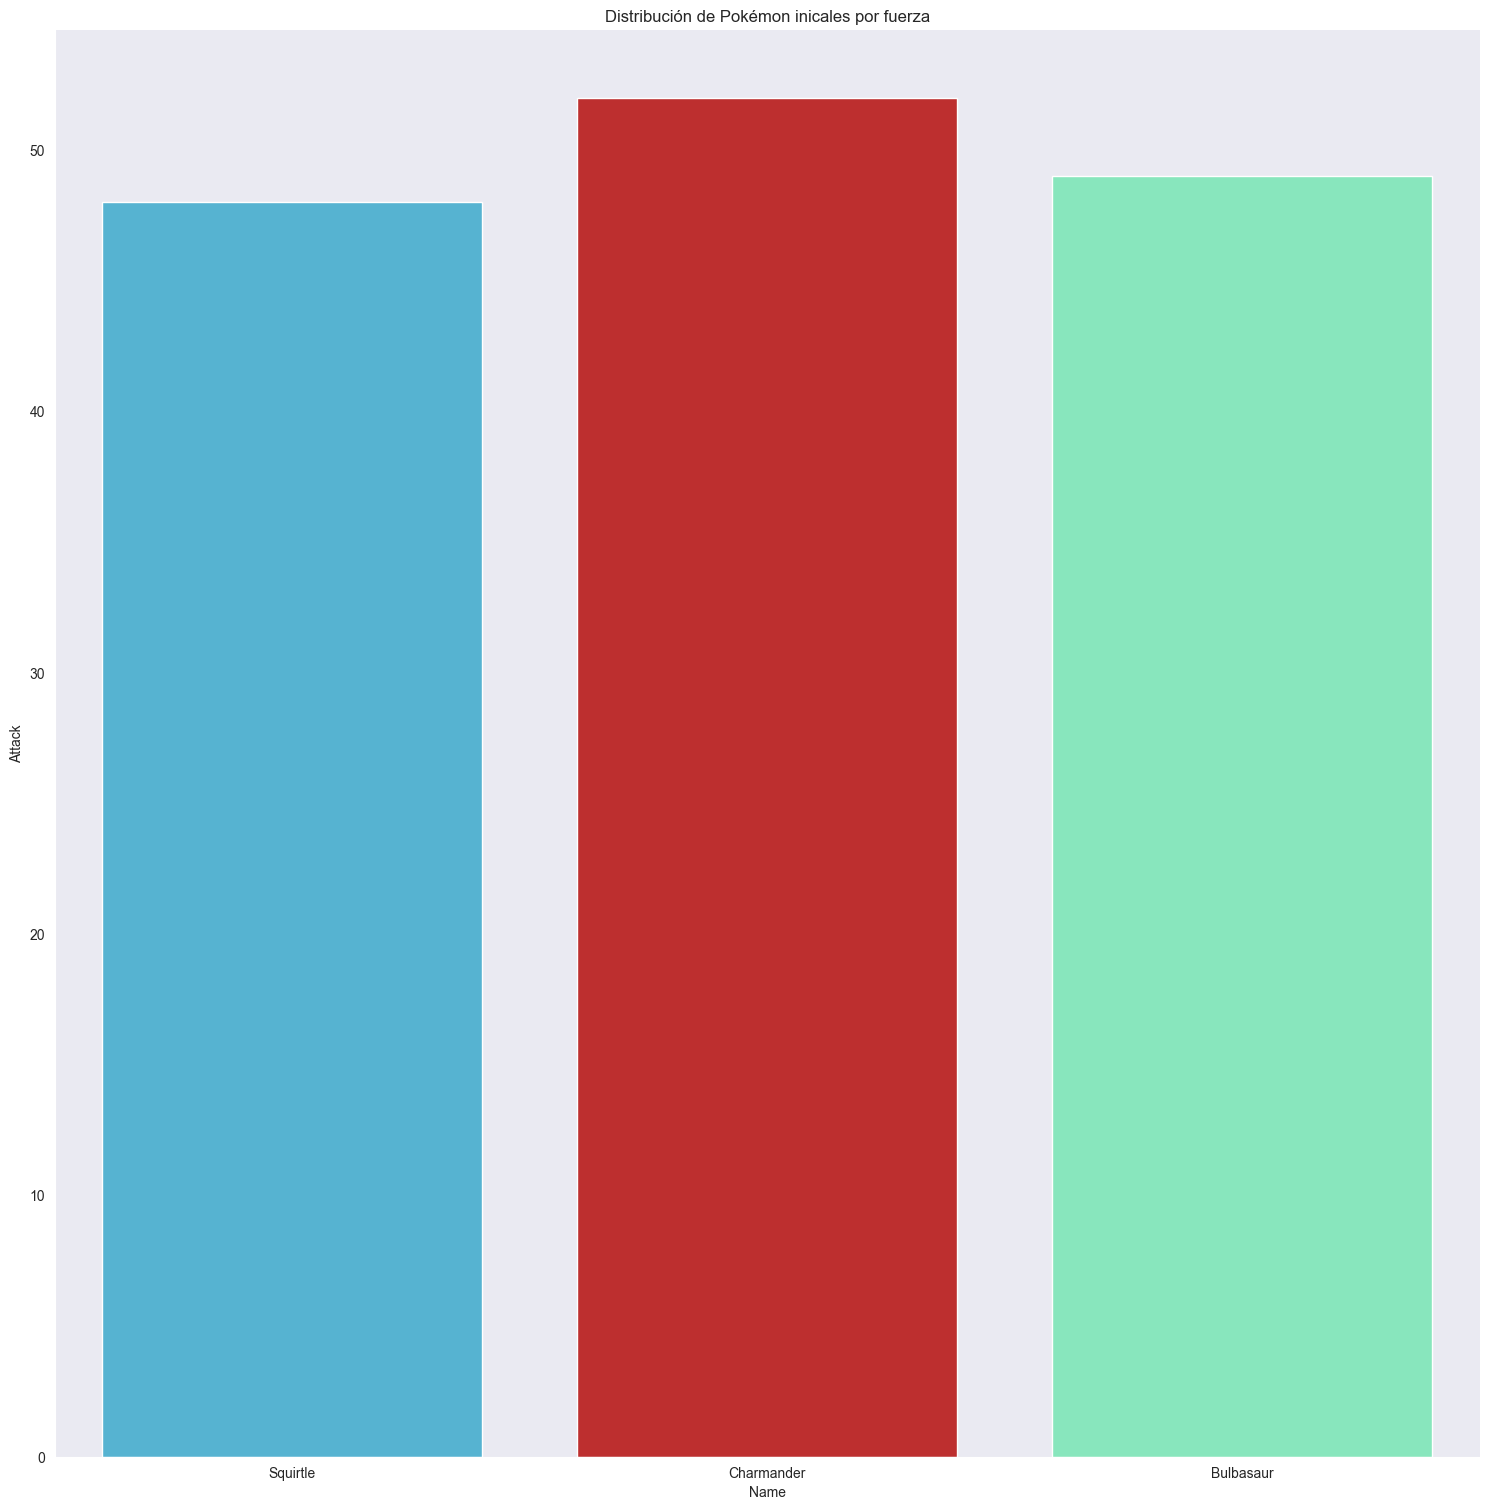

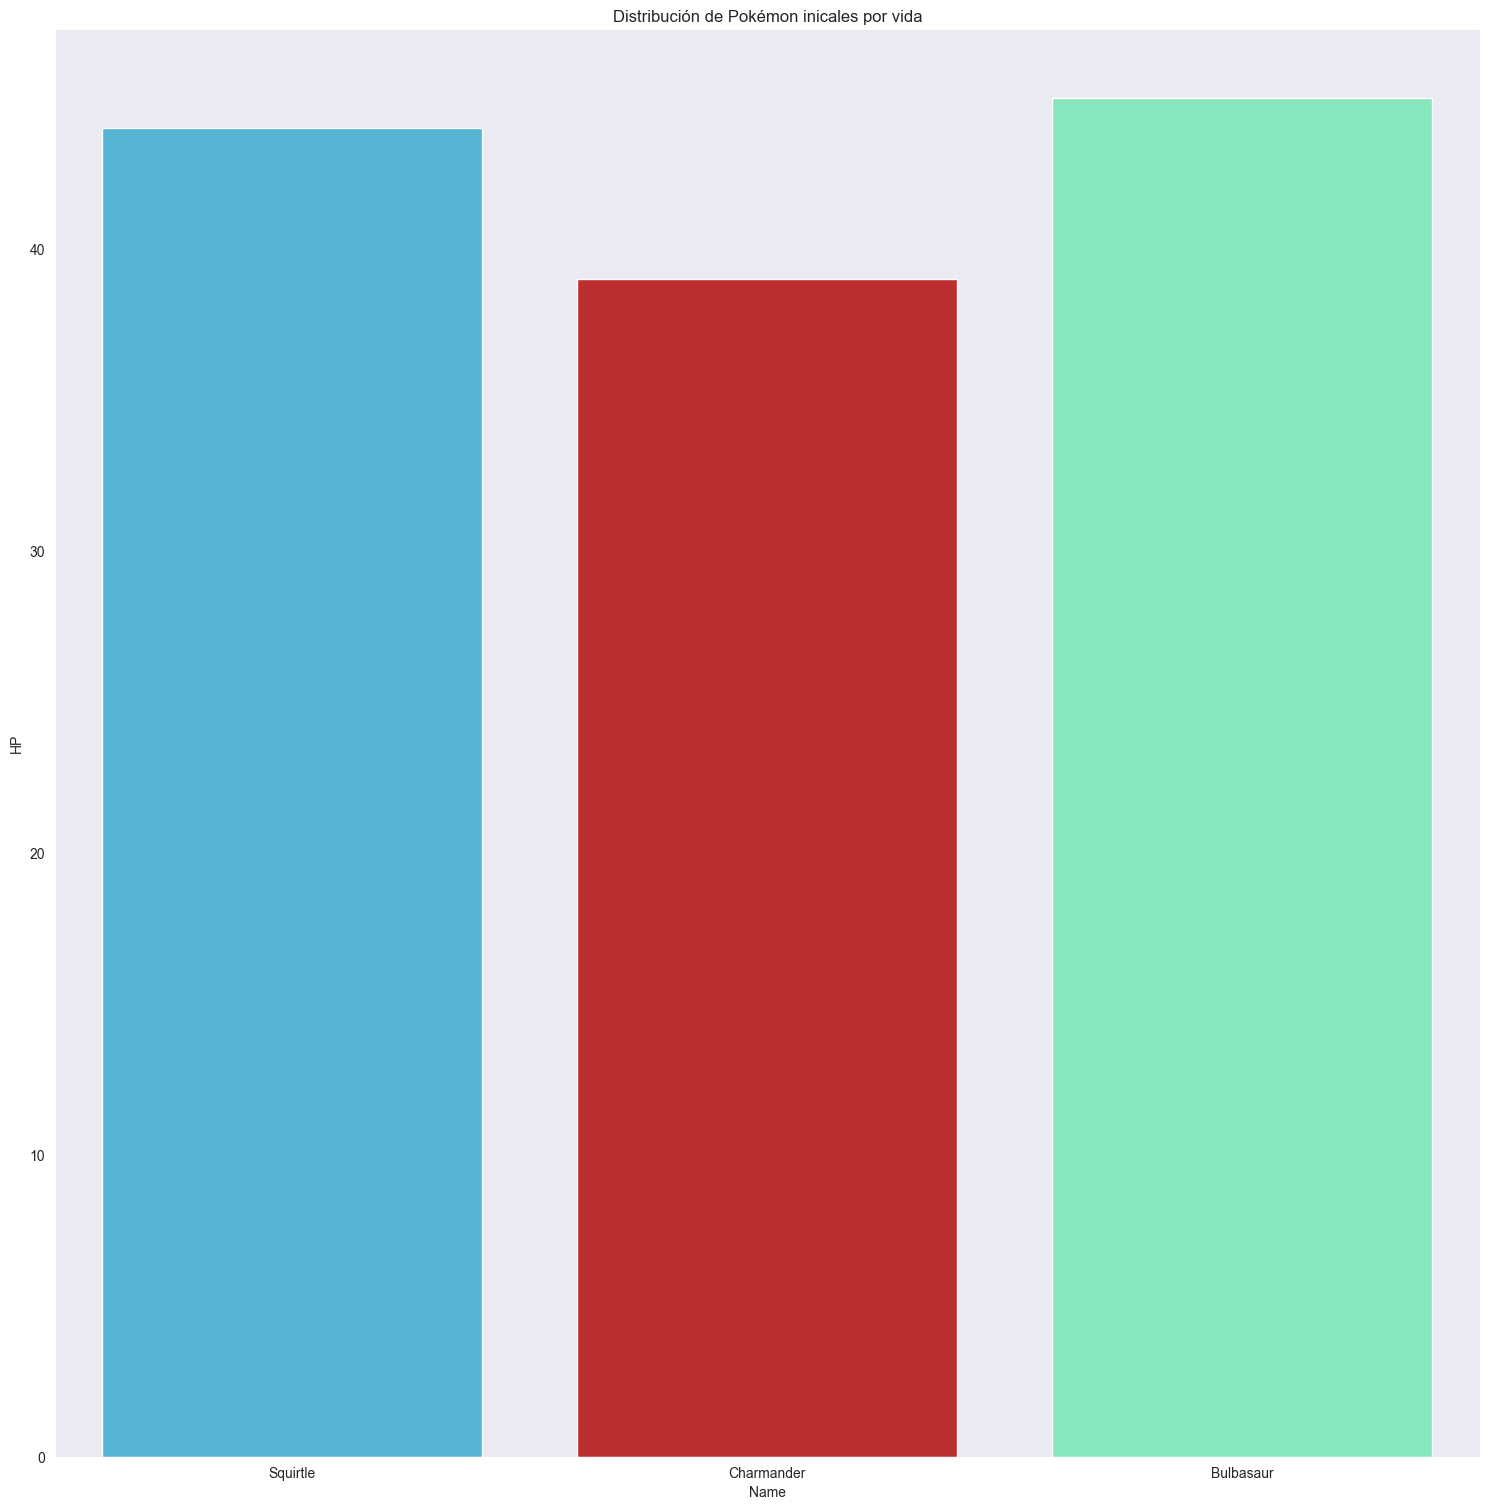

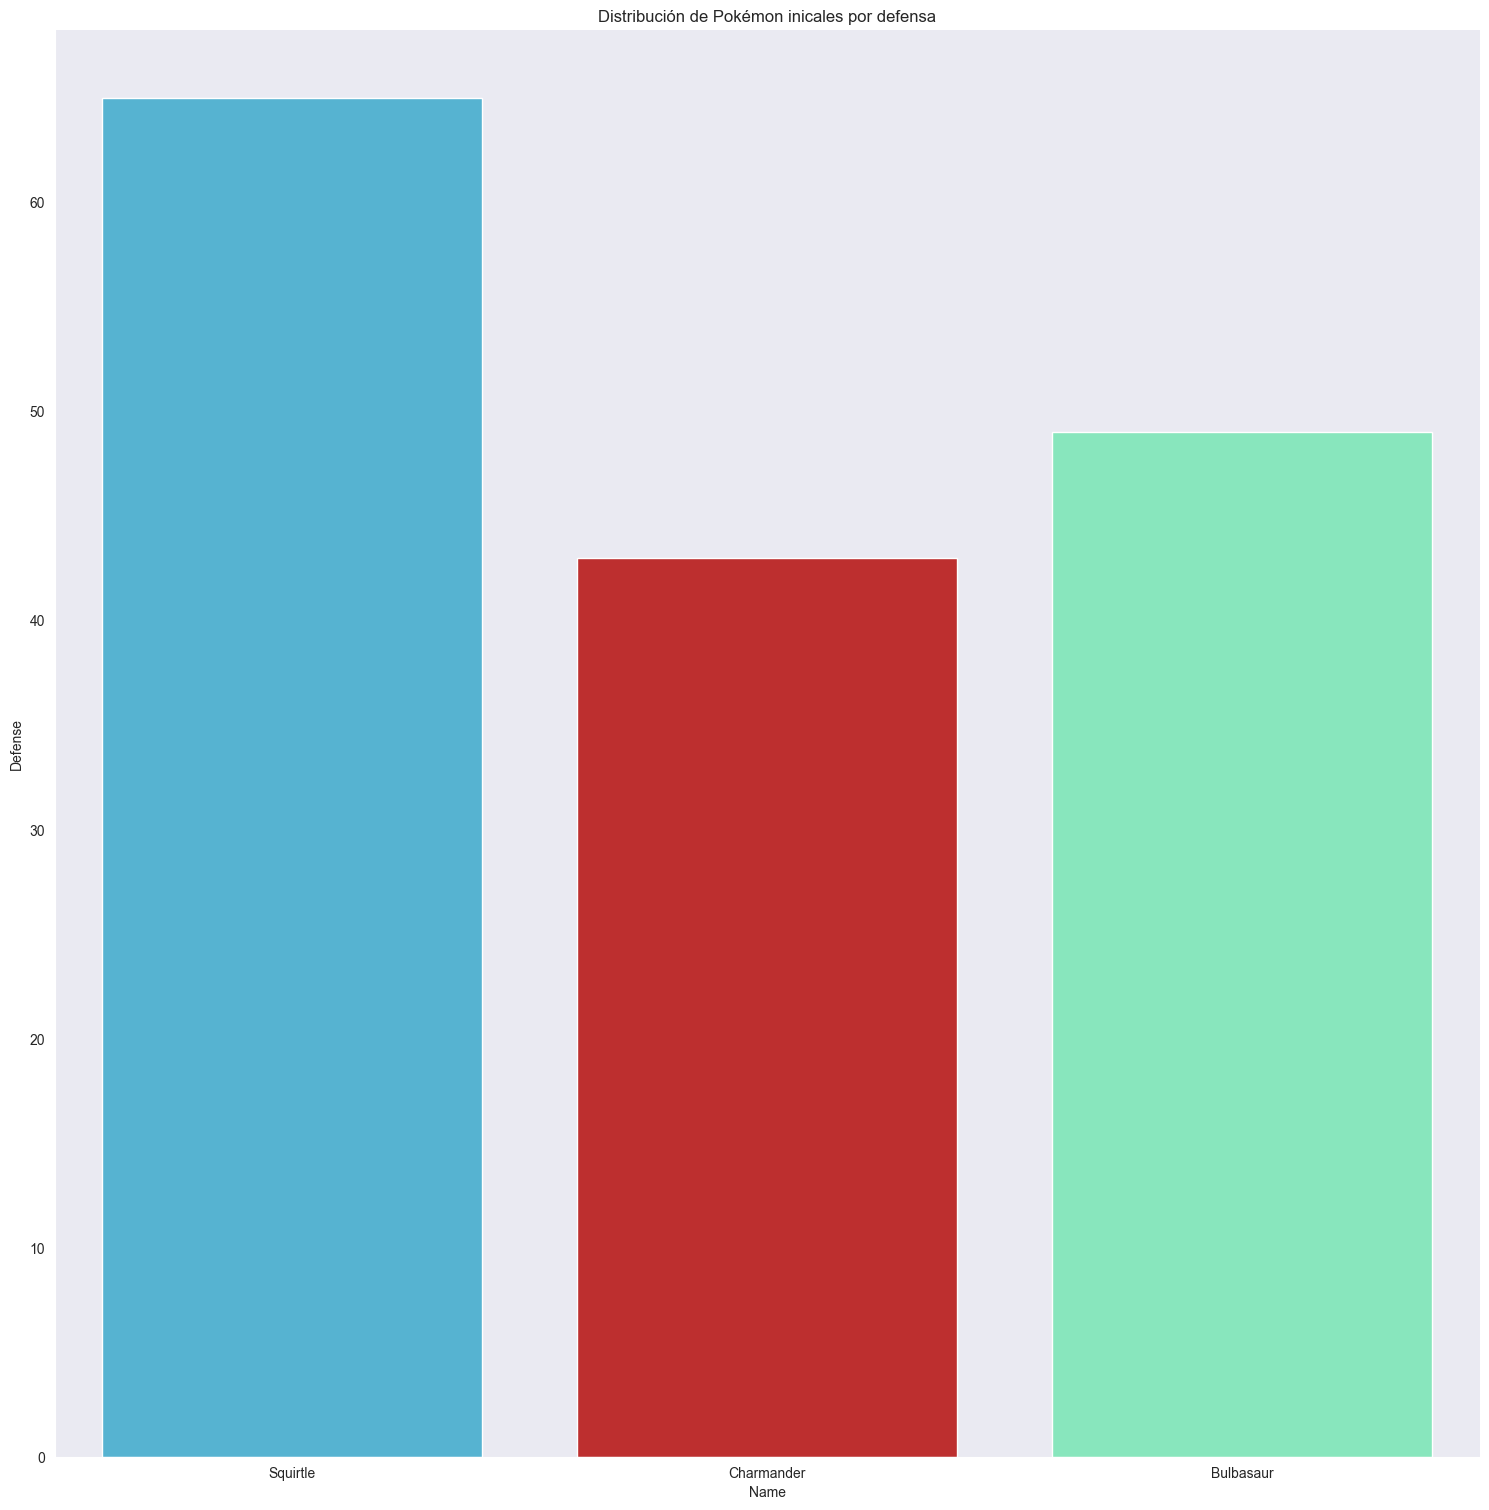

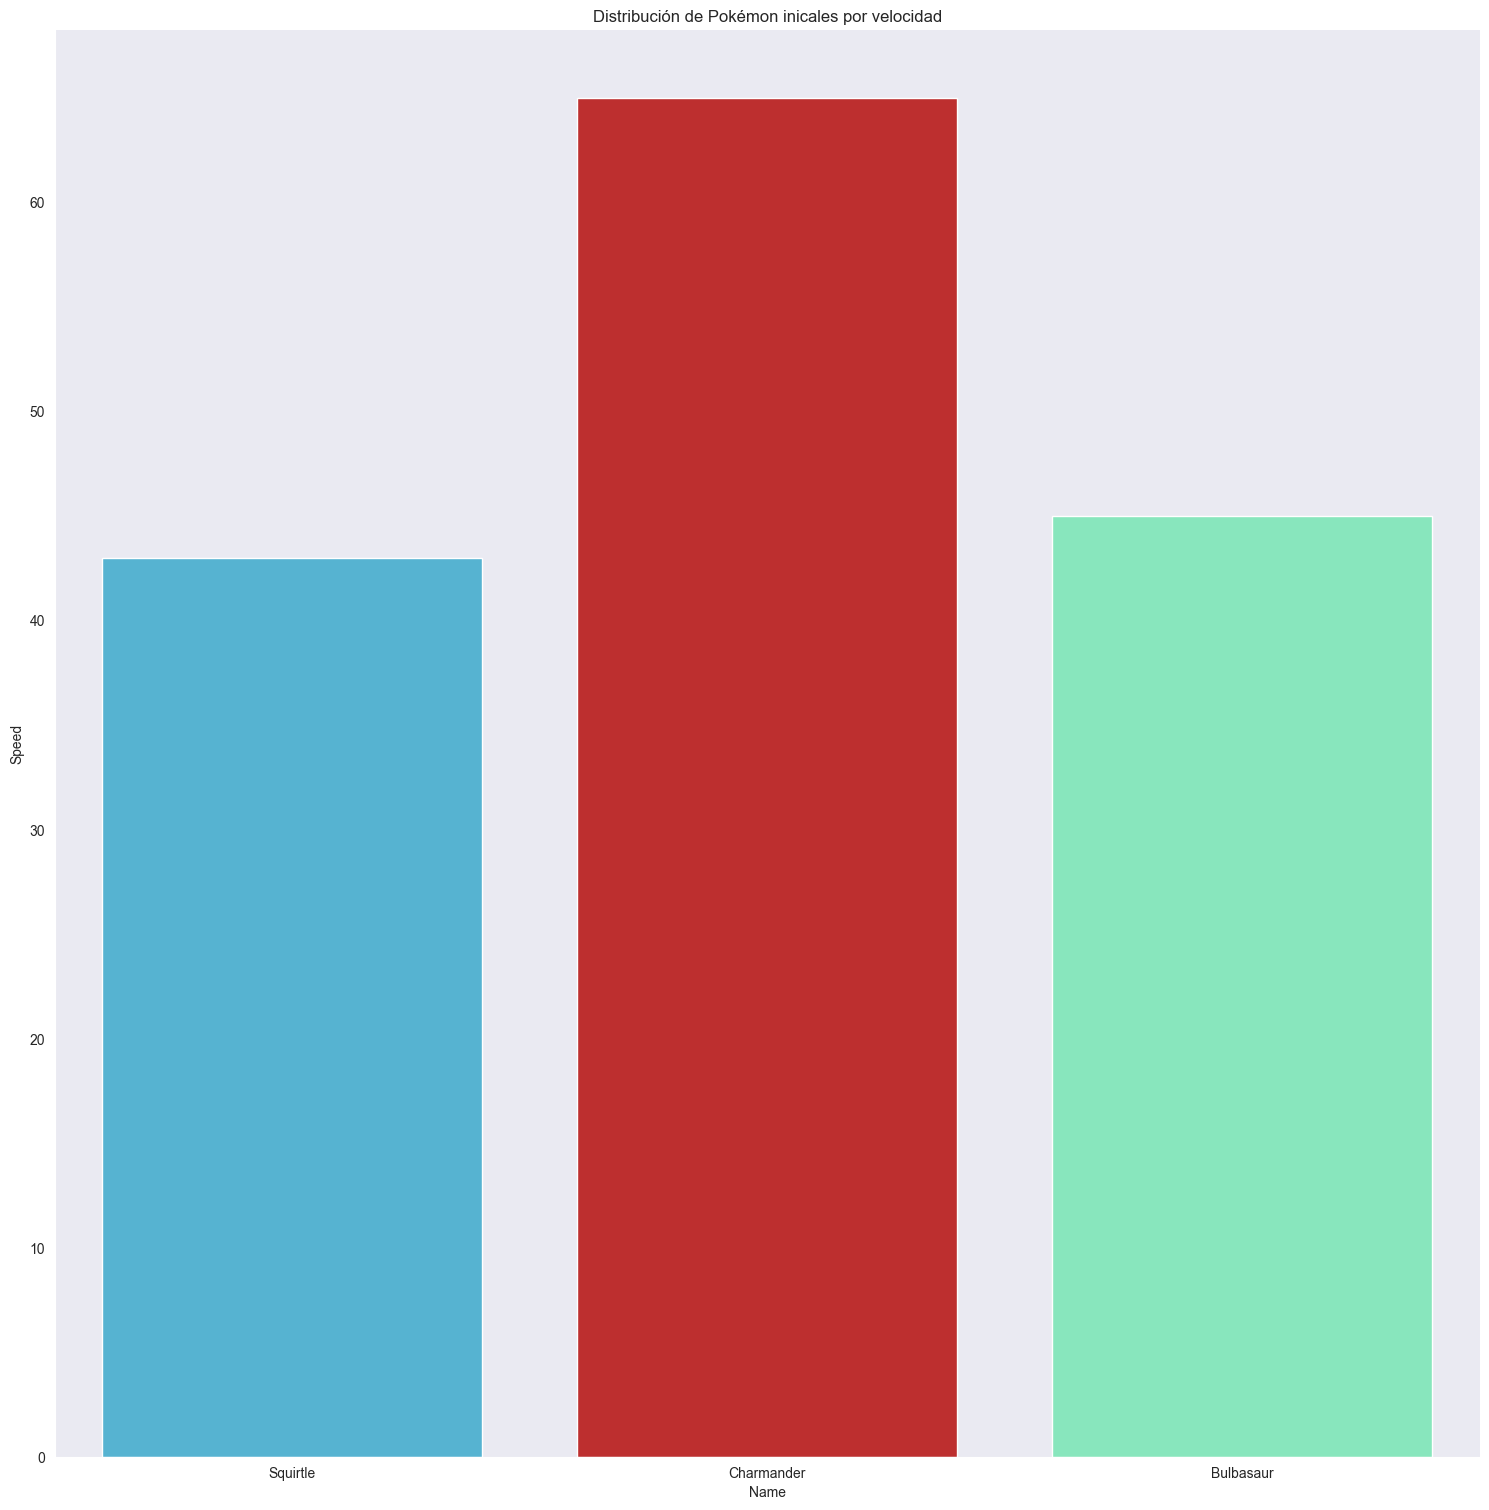

In [121]:

#Visualización por fuerza.
sns.catplot(best_ini, x= 'Name', hue='Name',legend=False, y='Attack', palette=['#41bee6', '#d51717', '#79f5bf'], kind="bar", height = 15) 
plt.title('Distribución de Pokémon inicales por fuerza')

#Visualización por vida.
sns.catplot(best_ini, x= 'Name', hue='Name',legend=False, y='HP', palette=['#41bee6', '#d51717', '#79f5bf'], kind="bar", height = 15) 
plt.title('Distribución de Pokémon inicales por vida')

#Visualización por defensa.
sns.catplot(best_ini, x= 'Name', hue='Name',legend=False, y='Defense', palette=['#41bee6', '#d51717', '#79f5bf'], kind="bar", height = 15) 
plt.title('Distribución de Pokémon inicales por defensa') 

#Visualización por velocidad.
sns.catplot(best_ini, x= 'Name', hue='Name',legend=False, y='Speed', palette=['#41bee6', '#d51717', '#79f5bf'], kind="bar", height = 15) 
plt.title('Distribución de Pokémon inicales por velocidad')
